In [1]:
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay  # Importar Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotlib and provides a high-level interface for drawing statistical graphs.
import requests # Import requests library to make HTTP requests in Python easily.
import pandas as pd
from scipy.spatial.distance import pdist, squareform 
from sklearn.decomposition import PCA
from scipy.spatial import KDTree

In [2]:
import os
import requests
import csv
#Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'X', 'Y',  'Tipo']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Mostrar las primeras filas del DataFrame
    print("Contenido de", archivo_csv)
    print(df.head(5))
    
    # Contar el número de IDs distintos
    num_ids_distintos = df['id'].nunique()
    print("Número de IDs distintos:", num_ids_distintos)

# Obtener una lista de fenotipos únicos
    fenotipos_unicos = df['Tipo'].unique().tolist()
    print("Fenotipos únicos:", fenotipos_unicos)

Contenido de high_grade_dysplasia.csv
       id            X            Y              Tipo
0  CellID   X_centroid   Y_centroid         phenotype
1      28  15954.03297  10809.96703  non-immune cells
2     103  15728.93023  9802.246238       tumor cells
3     141  15872.66042  10464.04583  non-immune cells
4     193  16304.46779  10769.14976       tumor cells
Número de IDs distintos: 2311
Fenotipos únicos: ['phenotype', 'non-immune cells', 'tumor cells', 'M1 type macrophage', 'CD4 T cells', 'likely-NKT cells', 'dendritic cells', 'CD8 T cells', 'NKT cells', 'B cells', 'T cells']
Contenido de low_grade_dysplasia.csv
       id            X            Y              Tipo
0  CellID   X_centroid   Y_centroid         phenotype
1      87  14793.98923  8843.229803       CD8 T cells
2     186  15204.70638  8889.964765  non-immune cells
3     208  14862.13941  9015.434316       CD4 T cells
4     274   15083.8345  8601.980365       CD8 T cells
Número de IDs distintos: 1265
Fenotipos únicos: ['phen

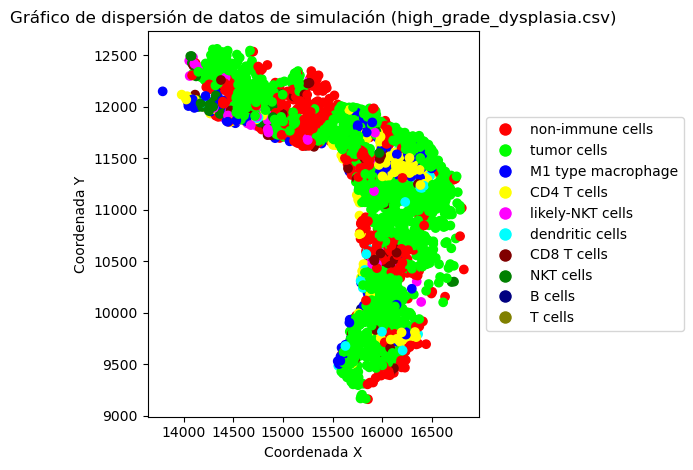

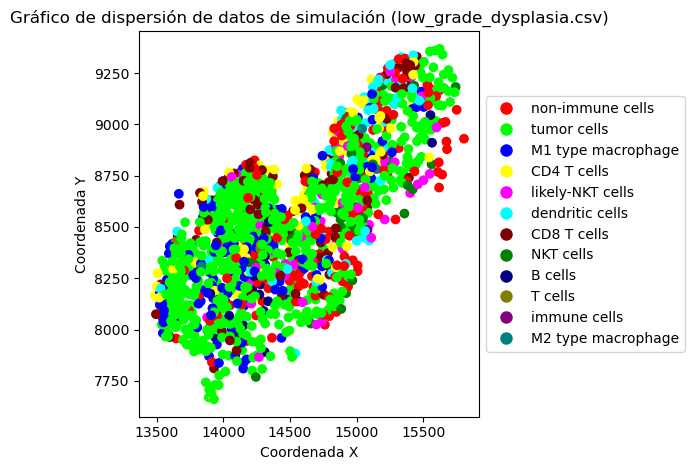

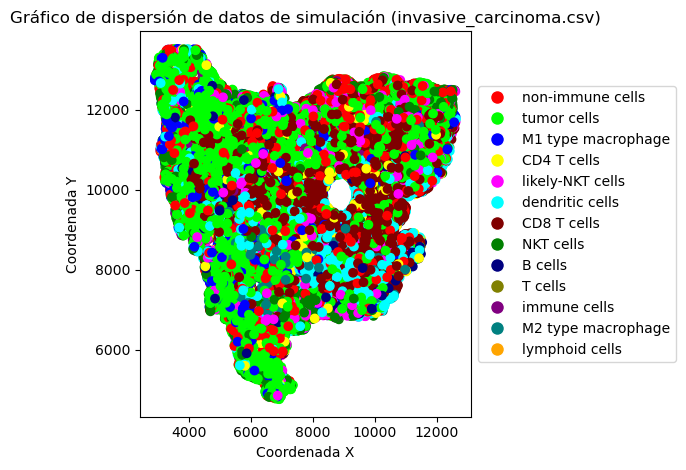

DataFrame 1:
      CellID   X_centroid    Y_centroid           phenotype
0         28  15954.03297  10809.967030    non-immune cells
1        103  15728.93023   9802.246238         tumor cells
2        141  15872.66042  10464.045830    non-immune cells
3        193  16304.46779  10769.149760         tumor cells
4        211  15953.36195  10027.702020         tumor cells
...      ...          ...           ...                 ...
2305   97168  16131.41600  11047.376000         tumor cells
2306   97297  15791.71667  11532.825000    non-immune cells
2307   97315  14218.91379  12106.672410  M1 type macrophage
2308   97411  15988.49351  10739.064940         tumor cells
2309   97454  14718.45161  11913.000000         tumor cells

[2310 rows x 4 columns]

DataFrame 2:
      CellID   X_centroid   Y_centroid         phenotype
0         87  14793.98923  8843.229803       CD8 T cells
1        186  15204.70638  8889.964765  non-immune cells
2        208  14862.13941  9015.434316       CD4 T cells


In [3]:
# Definir un diccionario de colores para cada fenotipo
color_map = {
    'non-immune cells': '#FF0000',  # Rojo
    'tumor cells': '#00FF00',       # Verde
    'M1 type macrophage': '#0000FF',  # Azul
    'CD4 T cells': '#FFFF00',       # Amarillo
    'likely-NKT cells': '#FF00FF',  # Magenta
    'dendritic cells': '#00FFFF',   # Cian
    'CD8 T cells': '#800000',       # Marrón
    'NKT cells': '#008000',         # Verde oscuro
    'B cells': '#000080',           # Azul marino
    'T cells': '#808000',           # Oliva
    'immune cells': '#800080',      # Púrpura
    'M2 type macrophage': '#008080',  # Verde azulado
    'lymphoid cells': '#FFA500'     # Naranja
}

# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Inicializar una lista para almacenar los DataFrames
dataframes = []

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas X, Y y el fenotipo
    X = df['X_centroid']
    Y = df['Y_centroid']
    fenotipo = df['phenotype']
    
    # Crear un mapa de colores basado en los fenotipos
    #unique_fenotipos = fenotipo.unique()
    #colors = plt.cm.get_cmap('hsv', len(unique_fenotipos))  # Usando una paleta de colores
    #color_map = {fenotipo: colors(i) for i, fenotipo in enumerate(unique_fenotipos)}
    
    # Asignar colores a cada punto según el fenotipo
    #colores_puntos = [color_map[t] for t in fenotipo]
      # Asignar colores a cada punto según el fenotipo
    colores_puntos = [color_map.get(t, '#000000') for t in fenotipo] 

    
    # Crear el gráfico de dispersión
    plt.scatter(X, Y, c=colores_puntos, label='Células')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Gráfico de dispersión de datos de simulación ({archivo_csv})')

    #plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=key, 
    #            markerfacecolor=color_map[key], markersize=10) for key in color_map])
    #plt.show()

    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key, 
                       markerfacecolor=color, markersize=10) 
                       for key, color in color_map.items() if key in fenotipo.unique()]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Agregar el DataFrame a la lista
    dataframes.append(df)

# Imprimir los DataFrames
for i, df in enumerate(dataframes):
    print(f"DataFrame {i+1}:")
    print(df)
    print()

# Inicializar una lista para almacenar las matrices de distancias
matrices_distancias = []

# Iterar sobre cada DataFrame
for df in dataframes:
    # Calcular la matriz de distancias
    matrix_distance = pdist(df[['X_centroid', 'Y_centroid']], metric='euclidean')
    matrices_distancias.append(squareform(matrix_distance))

# Imprimir las matrices de distancias
for i, matrix in enumerate(matrices_distancias):
    print(f"Matriz de distancias para DataFrame {i+1}:")
    print(matrix)
    print()

# Iterar sobre cada matriz de distancias
for i, matrix_distance in enumerate(matrices_distancias):
    # Obtener la forma de la matriz de distancias
    forma_matriz = np.shape(matrix_distance)[0]
    print(f"Forma de la matriz de distancias para DataFrame {i+1}: {forma_matriz}")
    
    # Calcular el valor máximo
    maximo = matrix_distance.max()
    print(f"Valor máximo de la matriz de distancias: {maximo}")
    
    # Calcular el valor mínimo
    minimo = matrix_distance.min()
    print(f"Valor mínimo de la matriz de distancias: {minimo}")
    
    # Calcular el promedio
    promedio = matrix_distance.mean()
    print(f"Promedio de la matriz de distancias: {promedio}")

usetex mode requires TeX.


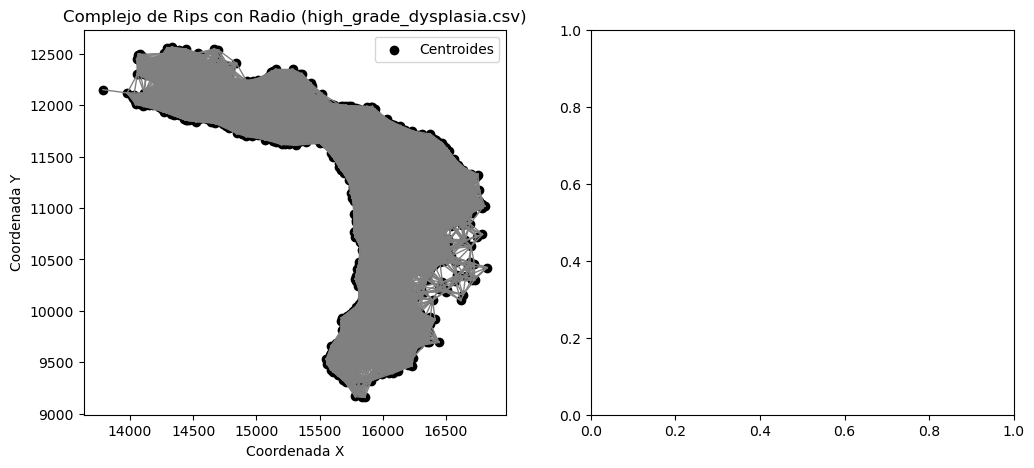

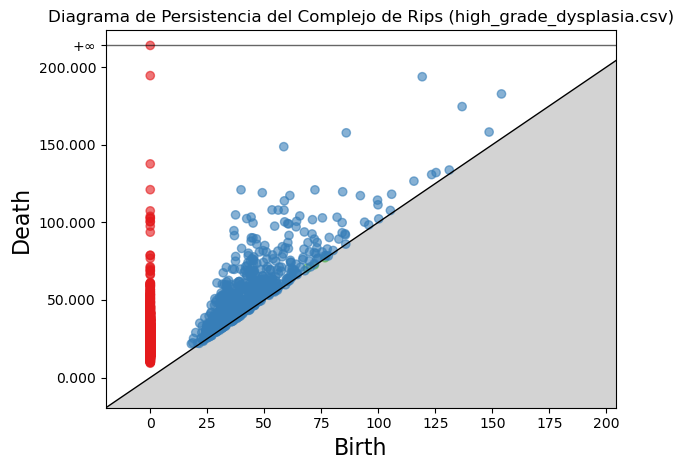

Archivo: high_grade_dysplasia.csv
Número de vecinos por punto: [90, 75, 93, 54, 107, 23, 64, 92, 118, 36, 88, 121, 75, 69, 85, 48, 113, 31, 60, 45, 116, 66, 80, 73, 112, 77, 101, 54, 73, 65, 105, 108, 81, 87, 86, 40, 29, 10, 46, 91, 50, 59, 51, 88, 87, 35, 99, 40, 54, 91, 122, 81, 70, 60, 123, 88, 74, 106, 19, 81, 102, 37, 127, 86, 52, 64, 18, 107, 33, 79, 63, 57, 121, 76, 58, 70, 77, 79, 78, 93, 105, 60, 124, 62, 76, 51, 36, 131, 106, 45, 114, 97, 97, 64, 66, 92, 66, 39, 98, 83, 58, 67, 75, 87, 97, 78, 96, 89, 49, 111, 101, 88, 58, 66, 77, 51, 115, 69, 93, 101, 71, 72, 23, 86, 98, 94, 120, 118, 110, 95, 114, 63, 52, 119, 133, 87, 63, 55, 90, 55, 95, 72, 119, 74, 38, 75, 47, 79, 46, 85, 87, 96, 62, 83, 146, 88, 79, 110, 44, 91, 45, 55, 111, 80, 60, 86, 91, 133, 94, 87, 100, 87, 90, 31, 110, 108, 86, 43, 65, 89, 85, 89, 118, 115, 64, 28, 89, 111, 55, 98, 74, 77, 48, 116, 75, 110, 104, 104, 13, 67, 83, 150, 48, 21, 31, 88, 77, 126, 86, 69, 94, 102, 108, 108, 62, 73, 144, 89, 50, 116, 85,

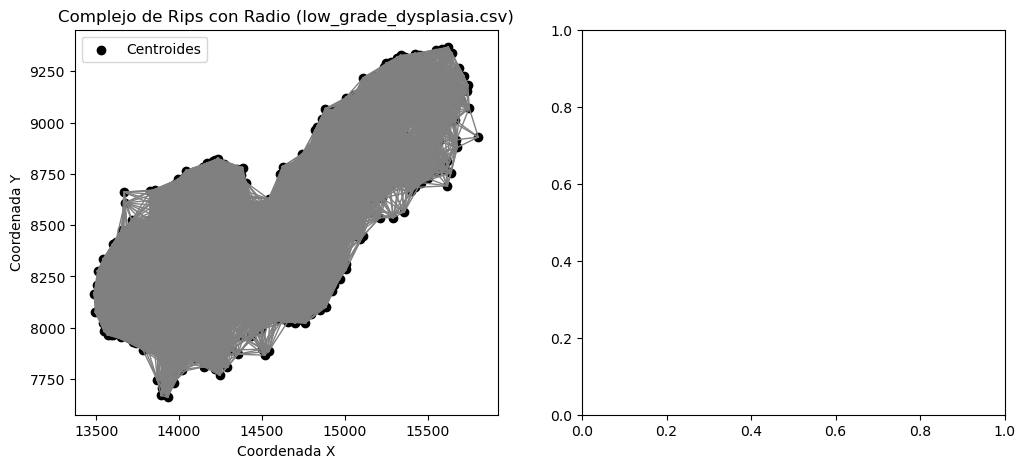

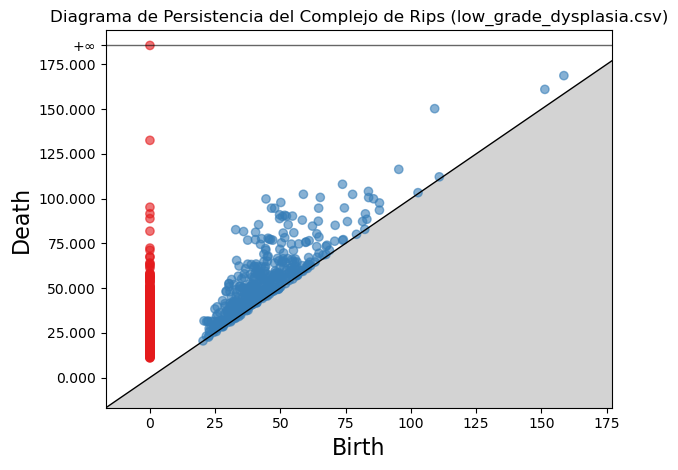

Archivo: low_grade_dysplasia.csv
Número de vecinos por punto: [79, 73, 58, 72, 62, 46, 26, 64, 71, 32, 43, 110, 65, 13, 77, 88, 69, 43, 21, 65, 38, 71, 97, 67, 47, 46, 54, 46, 63, 42, 83, 106, 146, 90, 29, 104, 161, 65, 72, 44, 59, 71, 36, 54, 148, 39, 25, 29, 65, 86, 24, 76, 82, 57, 64, 59, 65, 77, 21, 66, 52, 44, 59, 50, 163, 17, 15, 62, 71, 66, 55, 73, 55, 61, 113, 67, 44, 57, 49, 86, 39, 58, 37, 81, 81, 82, 115, 113, 51, 81, 80, 101, 46, 40, 71, 20, 86, 67, 76, 119, 75, 66, 89, 50, 99, 35, 42, 29, 57, 74, 81, 30, 99, 37, 87, 83, 80, 97, 106, 28, 43, 5, 70, 47, 72, 47, 91, 33, 58, 68, 57, 47, 62, 21, 90, 93, 133, 33, 38, 111, 30, 112, 58, 43, 122, 52, 148, 104, 75, 147, 150, 65, 65, 83, 62, 28, 140, 84, 90, 125, 110, 115, 104, 74, 76, 61, 15, 67, 124, 85, 53, 68, 93, 94, 66, 61, 42, 86, 47, 50, 84, 124, 42, 103, 96, 121, 35, 88, 91, 137, 34, 50, 73, 78, 86, 117, 87, 91, 78, 83, 115, 79, 54, 72, 96, 163, 53, 85, 52, 72, 160, 63, 87, 110, 113, 62, 90, 47, 110, 119, 53, 74, 48, 88, 56,

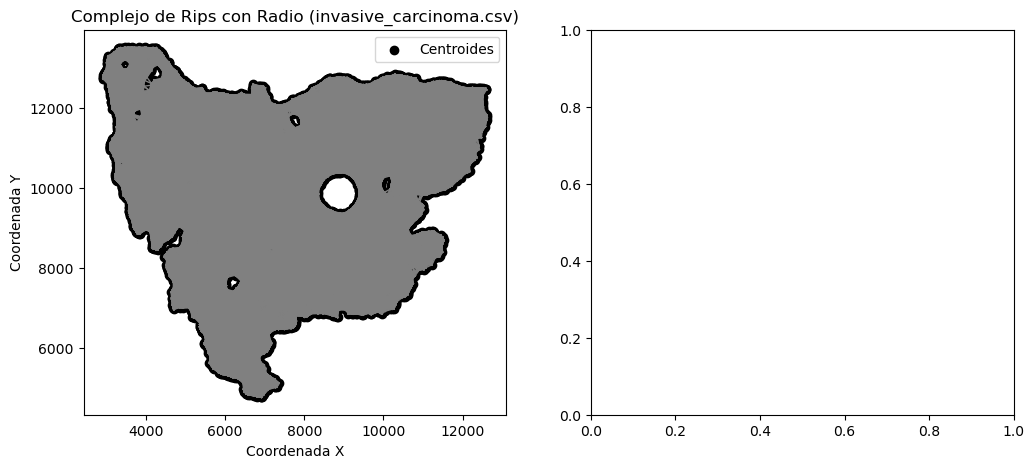

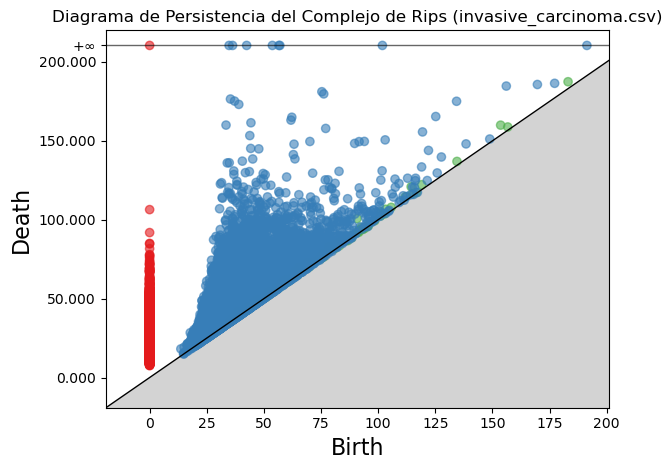

Archivo: invasive_carcinoma.csv
Número de vecinos por punto: [111, 124, 118, 126, 138, 125, 124, 165, 124, 129, 123, 175, 142, 129, 143, 115, 146, 143, 144, 94, 131, 115, 90, 165, 130, 133, 138, 83, 142, 145, 132, 117, 100, 113, 87, 152, 135, 126, 93, 137, 131, 119, 120, 125, 127, 163, 160, 126, 134, 109, 144, 109, 91, 160, 170, 139, 142, 124, 129, 132, 118, 145, 117, 77, 122, 92, 117, 178, 147, 151, 121, 135, 133, 106, 116, 91, 82, 97, 125, 166, 114, 140, 127, 130, 127, 187, 105, 137, 133, 61, 65, 160, 154, 125, 189, 105, 117, 139, 70, 68, 112, 126, 114, 119, 117, 90, 134, 111, 182, 168, 154, 137, 192, 92, 150, 184, 133, 148, 153, 132, 123, 132, 134, 110, 117, 142, 94, 100, 170, 93, 120, 108, 134, 161, 136, 123, 143, 135, 184, 120, 145, 107, 117, 96, 159, 177, 139, 135, 140, 67, 134, 111, 135, 121, 79, 117, 89, 154, 129, 131, 141, 86, 117, 136, 108, 171, 117, 164, 105, 149, 188, 119, 139, 119, 118, 75, 134, 111, 133, 137, 135, 110, 142, 73, 128, 125, 97, 112, 88, 145, 107, 80, 69, 98,

In [4]:
# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas de los centroides
    X = df['X_centroid']
    Y = df['Y_centroid']
    
    # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
    puntos = np.array(list(zip(X, Y)))

    # Calcular el complejo de Rips con un radio específico
    rips_complex = gd.RipsComplex(points=puntos, max_edge_length=200)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

    # Visualizar el complejo de Rips
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color='black', label='Centroides')
    for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
        if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
            arista = simplex[0]
            x = [X[i] for i in arista]
            y = [Y[i] for i in arista]
            plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
    plt.legend()

    # Calcular el diagrama de persistencia
    diag = simplex_tree.persistence()

    # Mostrar el diagrama de dispersión de persistencia
    plt.subplot(1, 2, 2)
    gd.plot_persistence_diagram(diag)
    plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
    plt.xlabel('Birth')
    plt.ylabel('Death')

    plt.tight_layout()
    plt.show()

  # ---- Nueva sección para calcular los vecinos ----
    # Usar un KDTree para calcular los vecinos de cada punto
    kdtree = KDTree(puntos)

    # Definir el radio para considerar a un punto como vecino
    radio_vecinos = 200  # El mismo radio utilizado para el complejo de Rips

    # Calcular el número de vecinos para cada punto dentro del radio
    num_vecinos = [len(kdtree.query_ball_point(punto, radio_vecinos)) - 1 for punto in puntos]

    # Calcular el promedio de vecinos
    promedio_vecinos = np.mean(num_vecinos)

    # Mostrar resultados
    print(f'Archivo: {archivo_csv}')
    print(f'Número de vecinos por punto: {num_vecinos}')
    print(f'Promedio de vecinos: {promedio_vecinos}')
    print('-----------------------------------------\n')


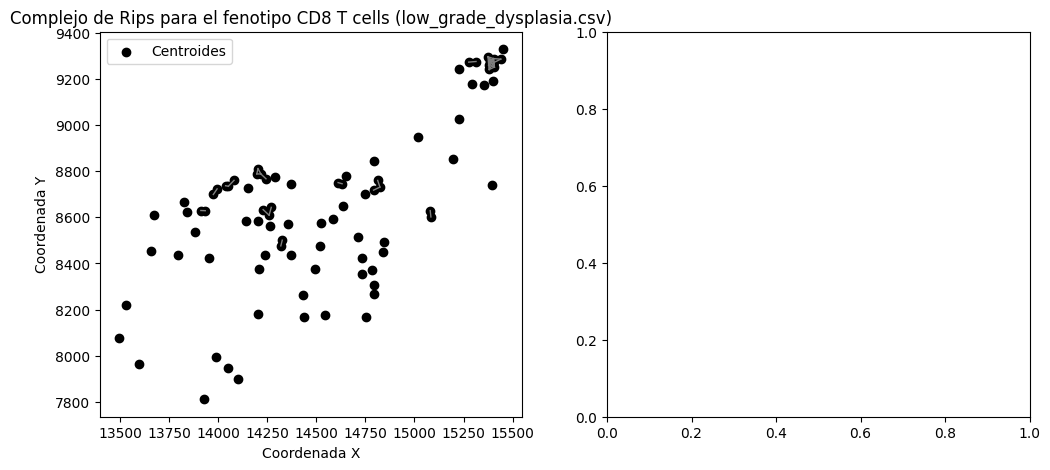

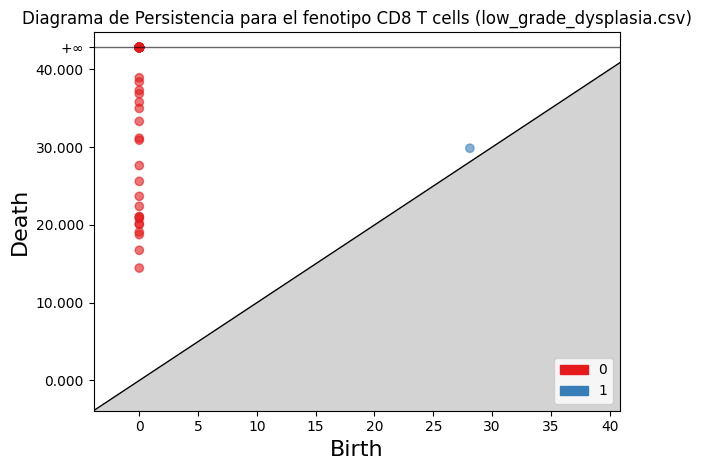

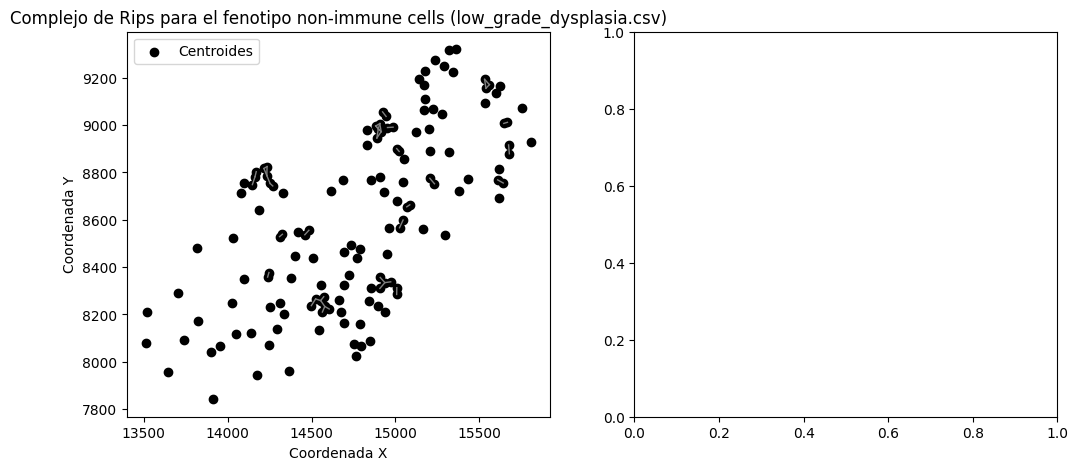

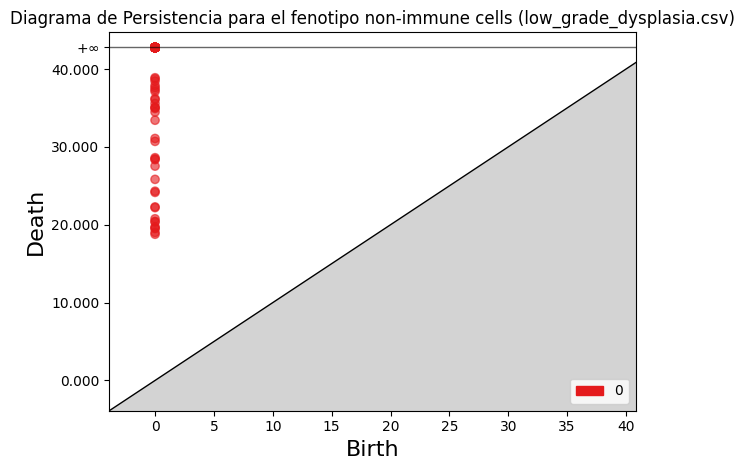

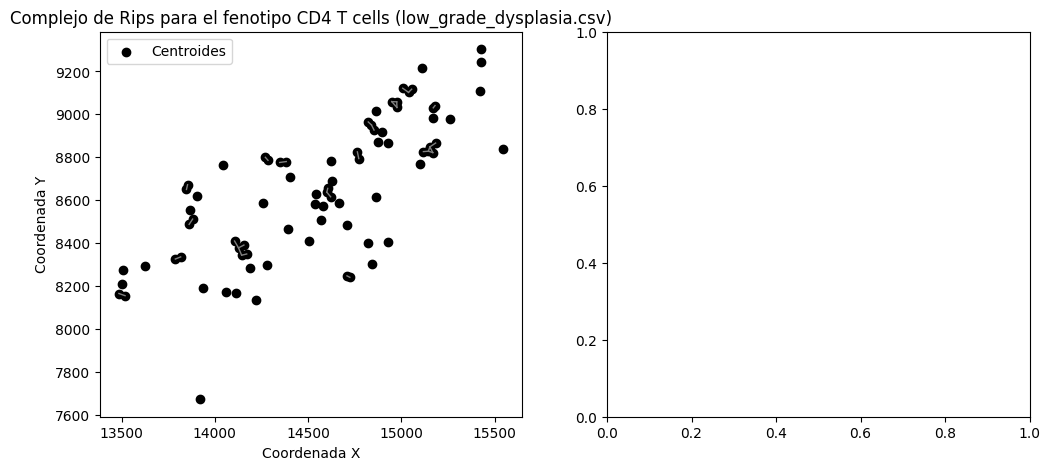

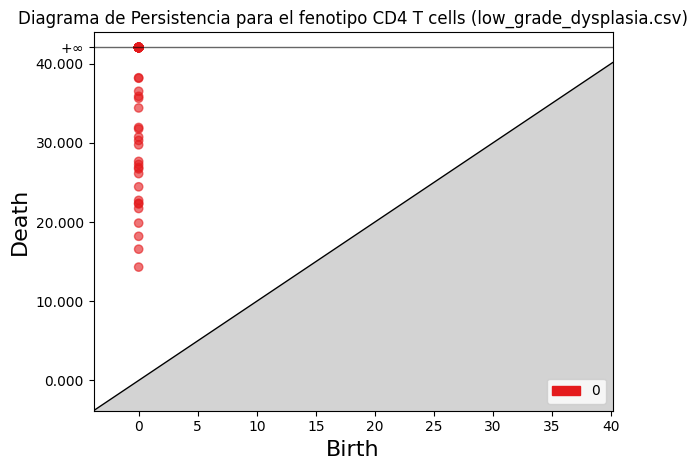

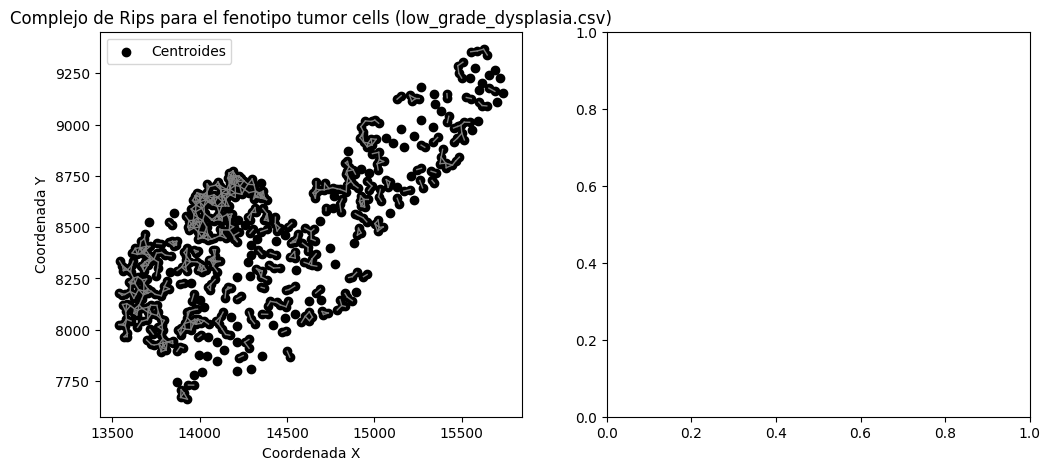

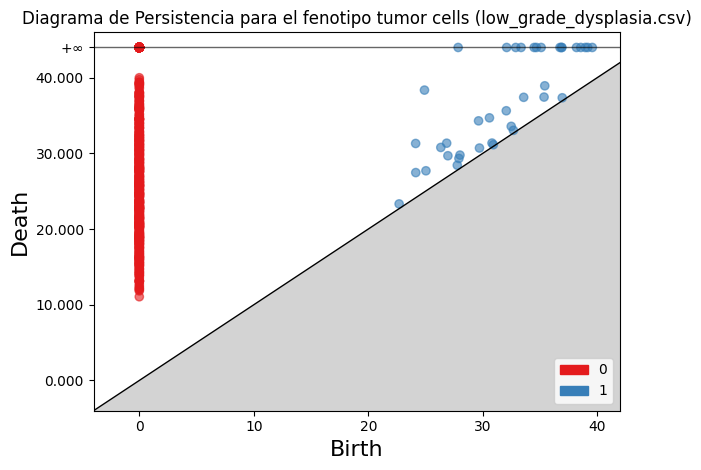

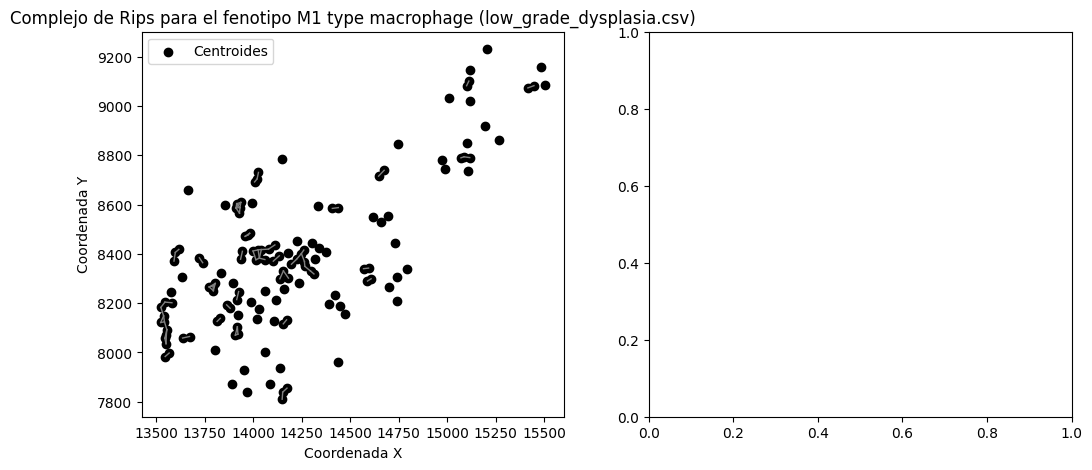

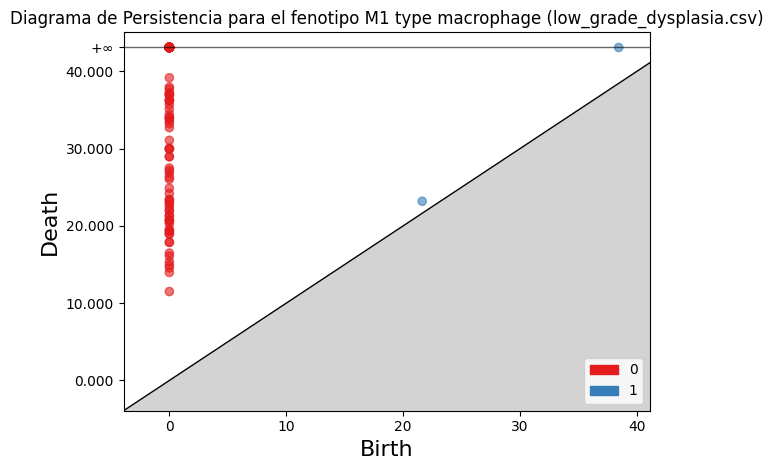

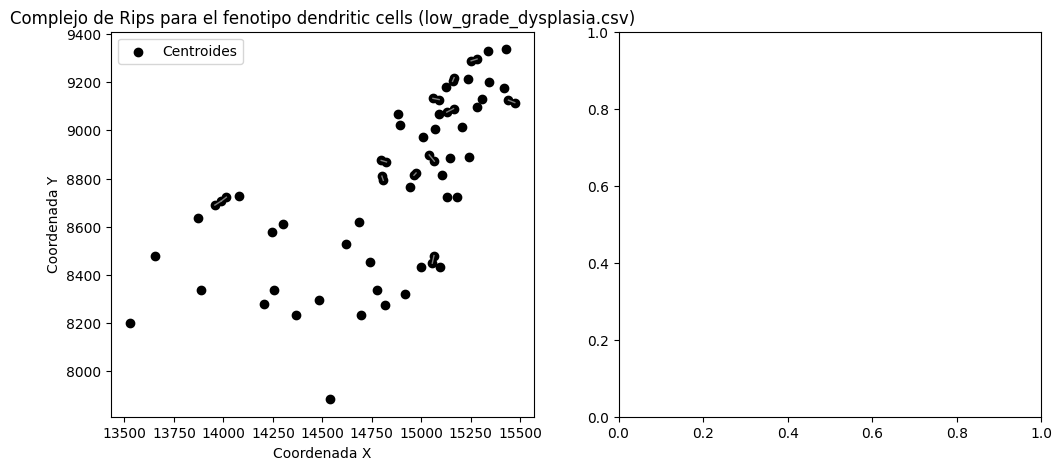

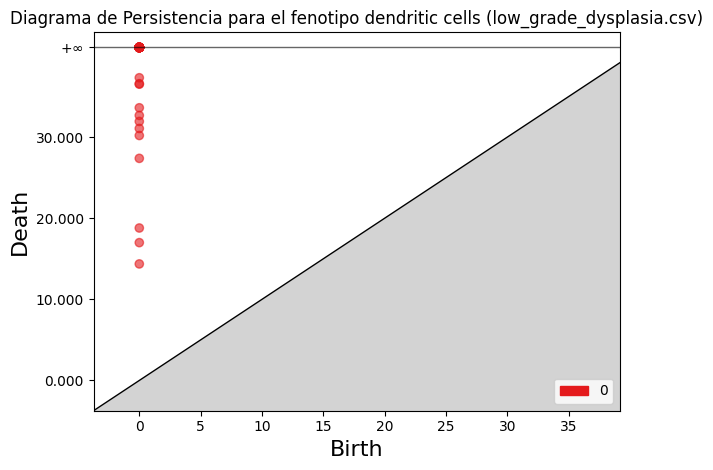

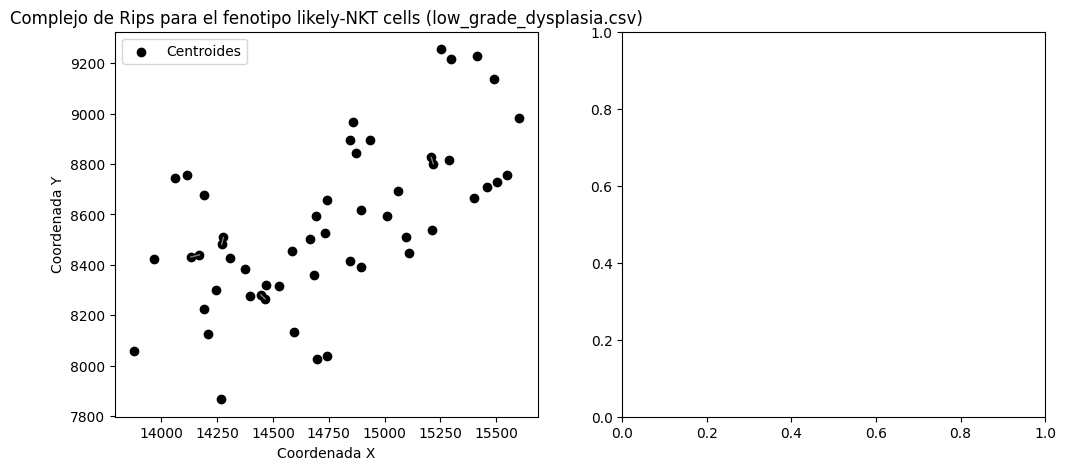

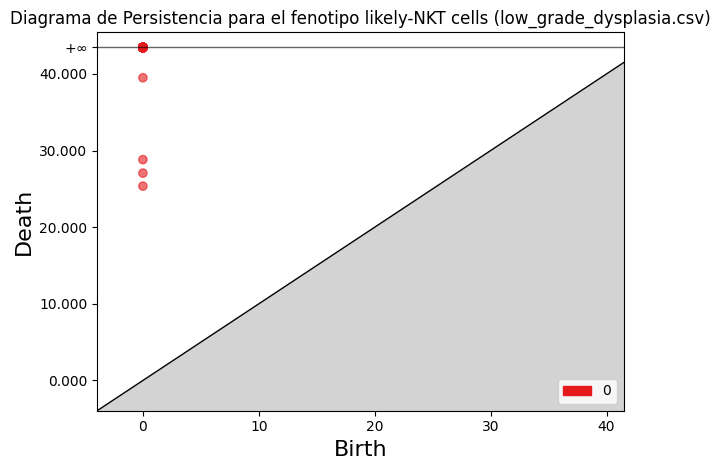

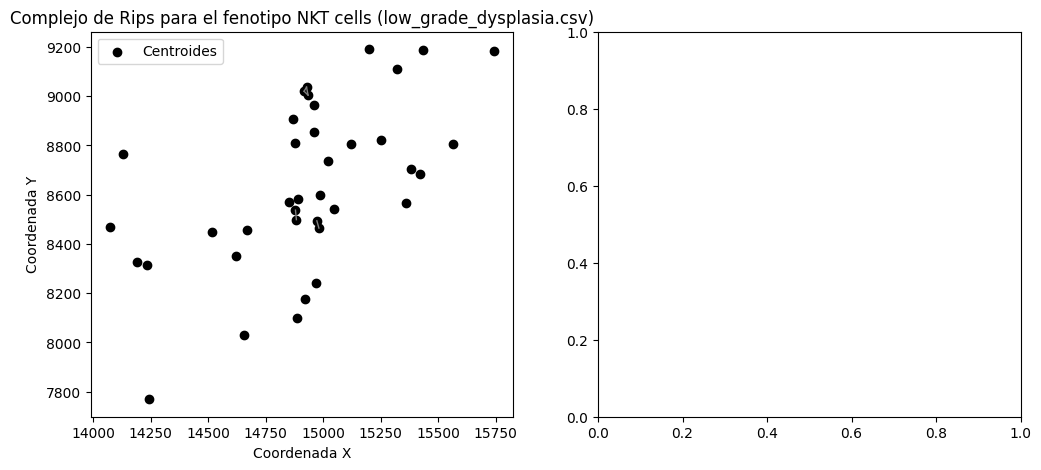

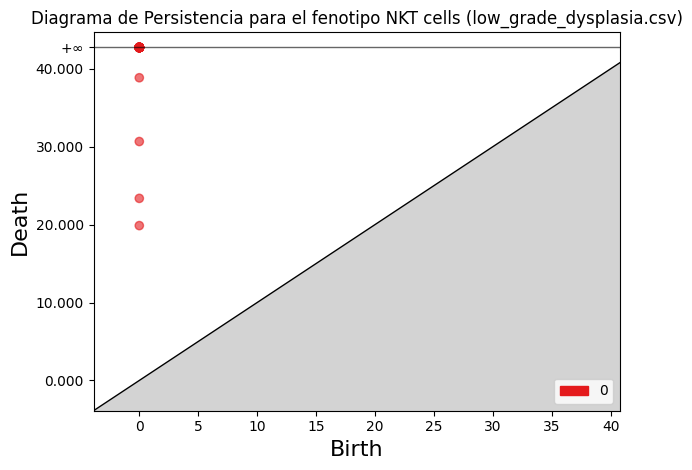

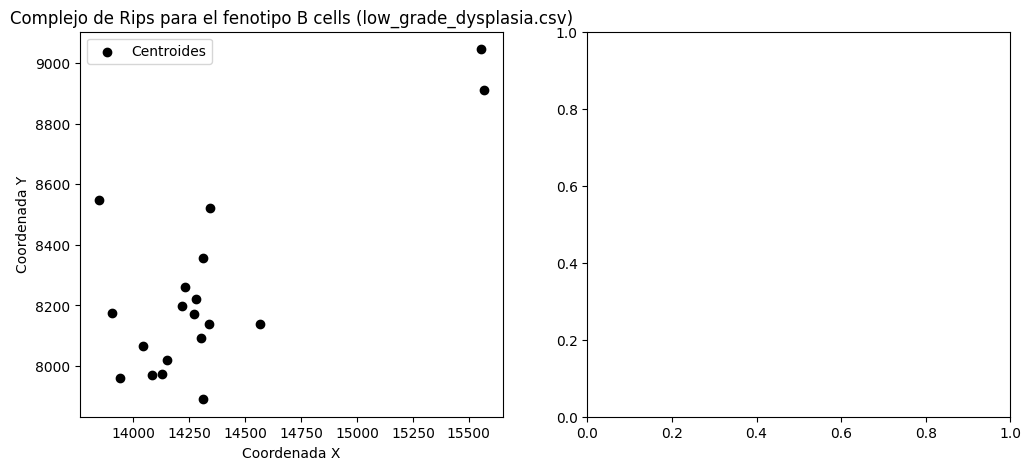

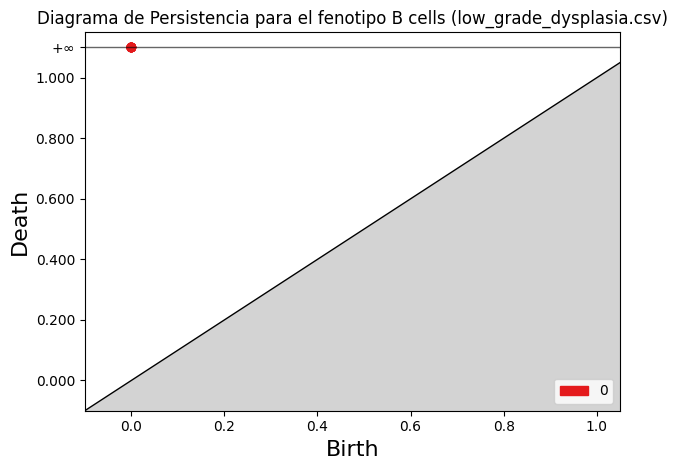

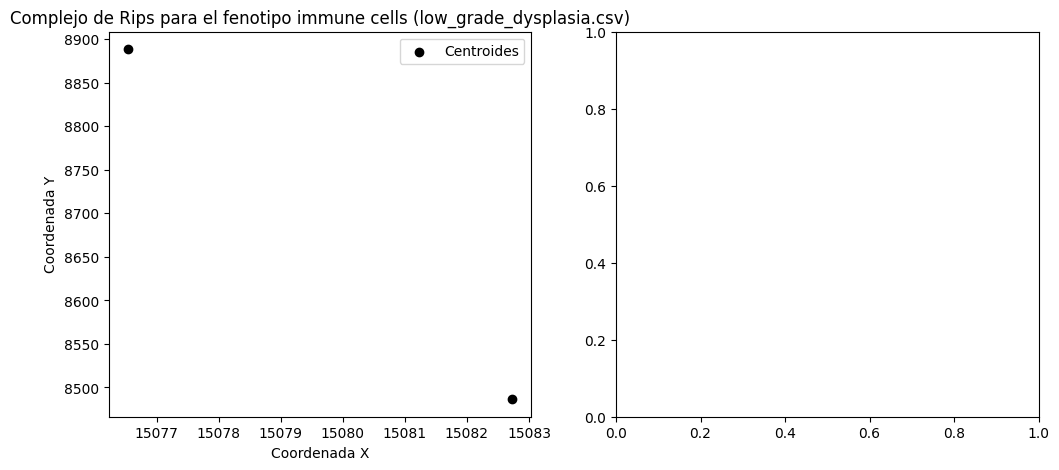

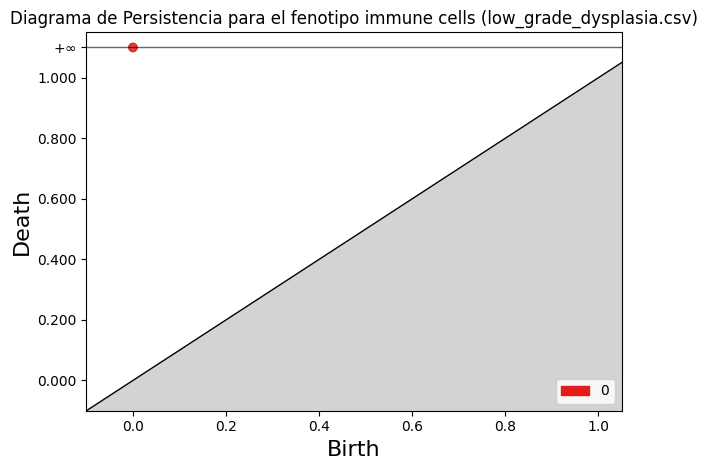

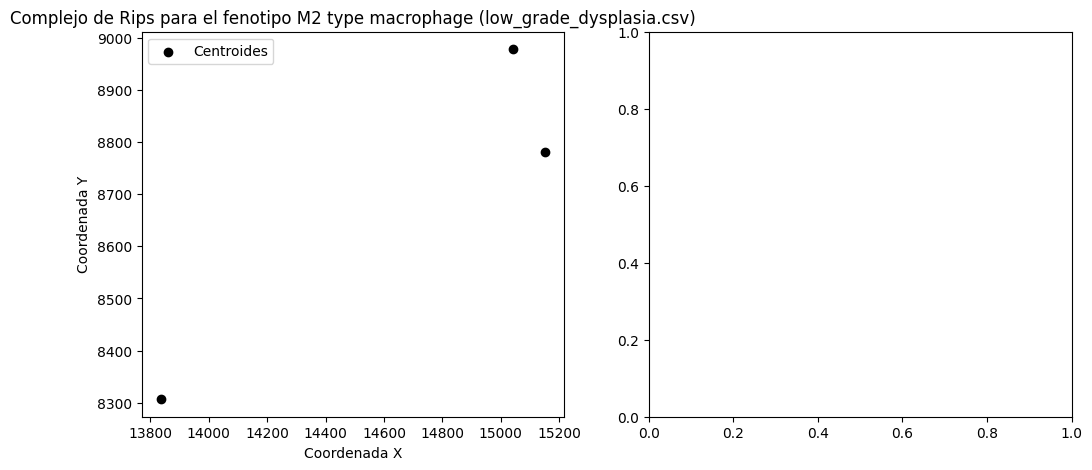

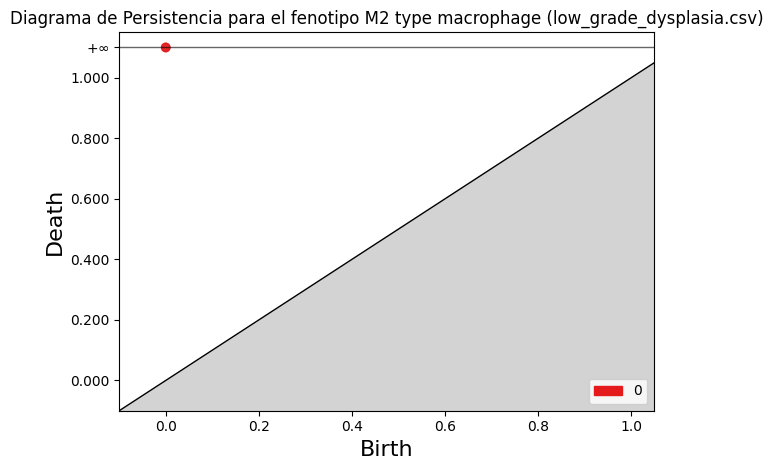

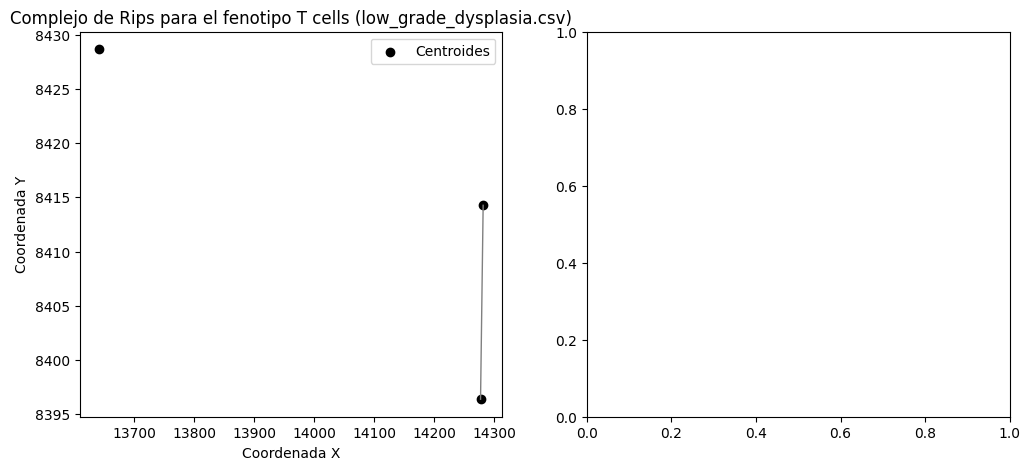

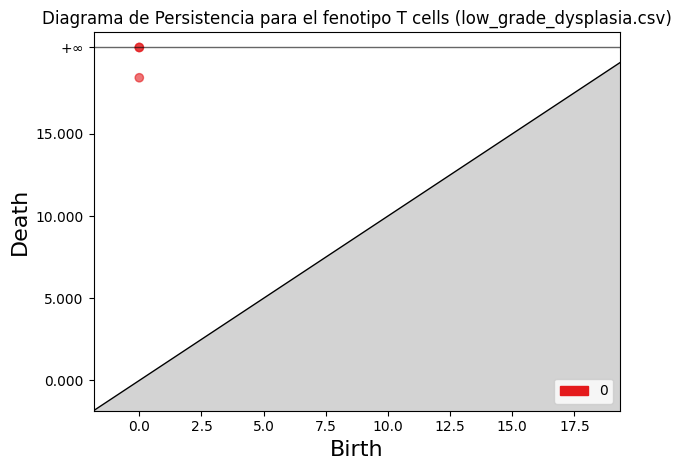

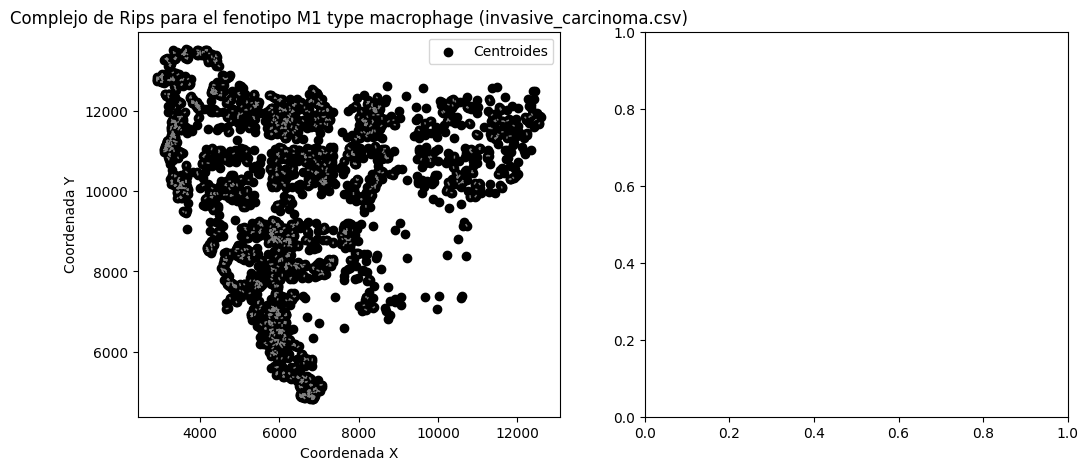

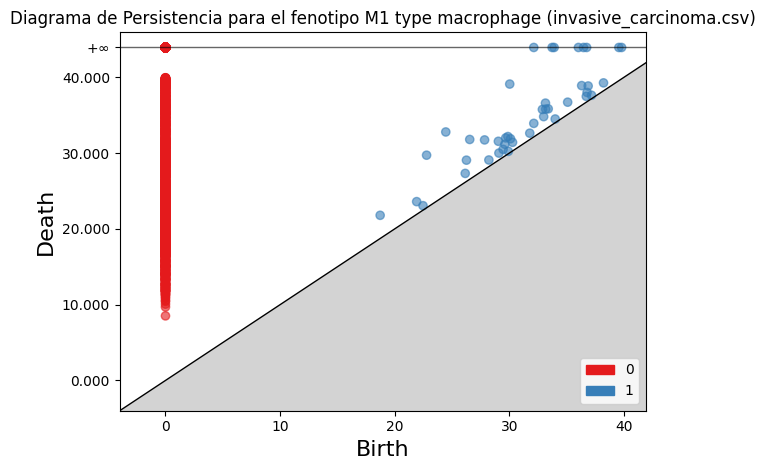

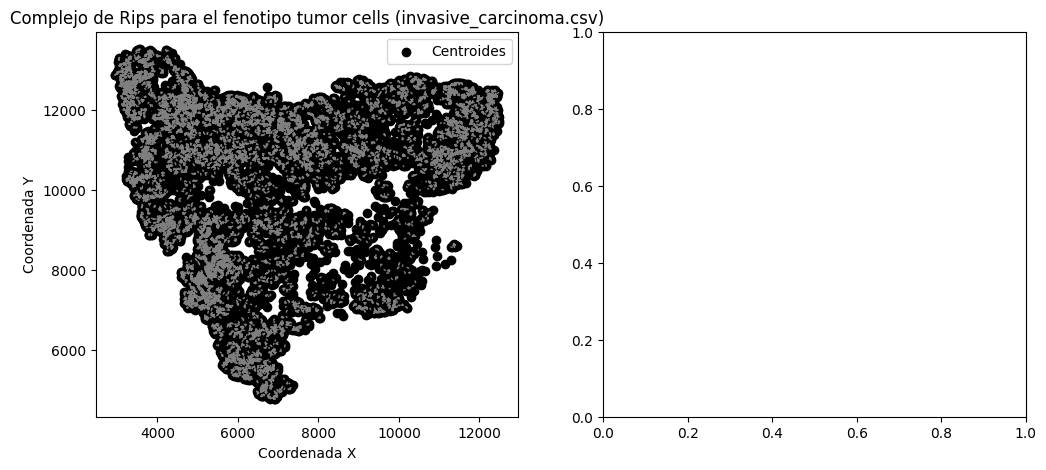

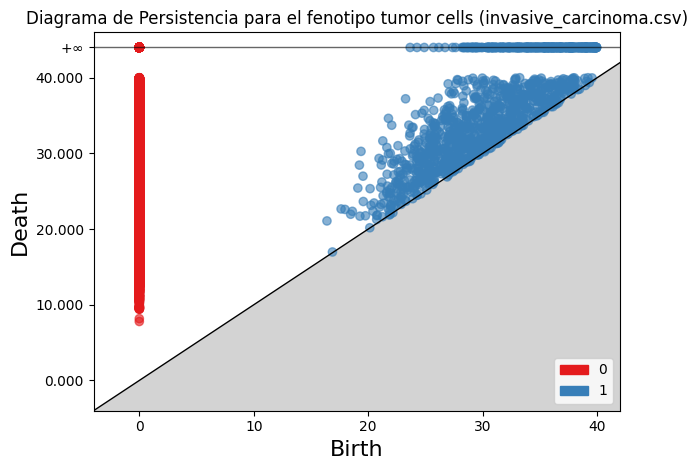

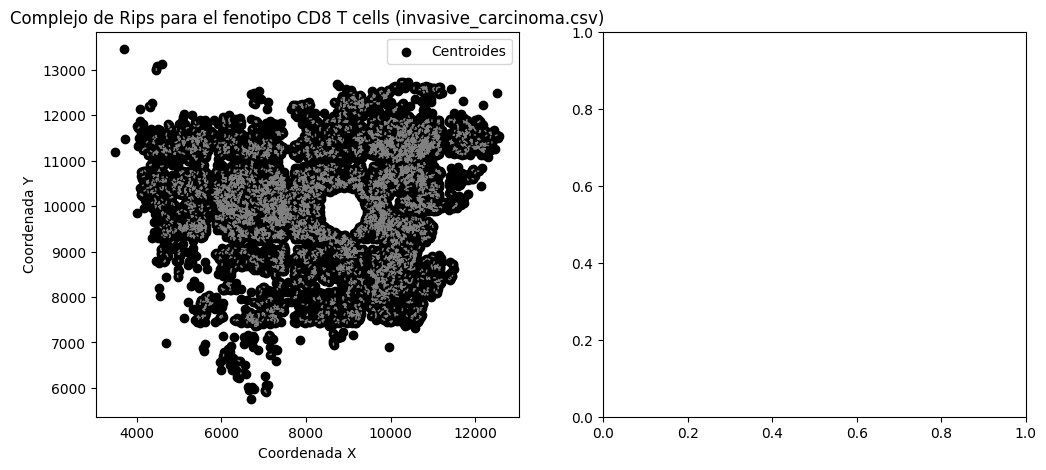

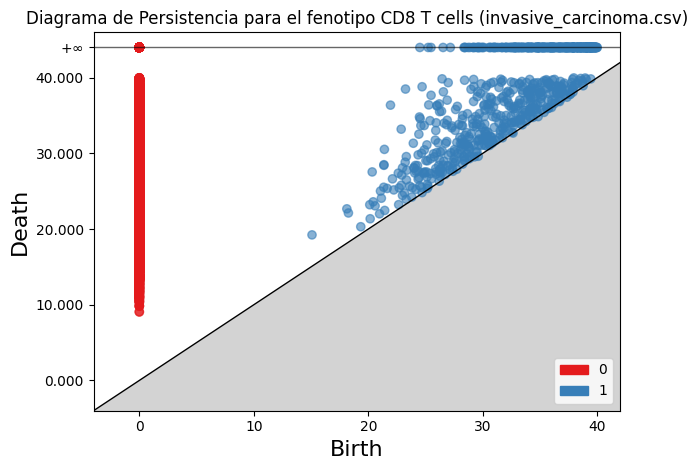

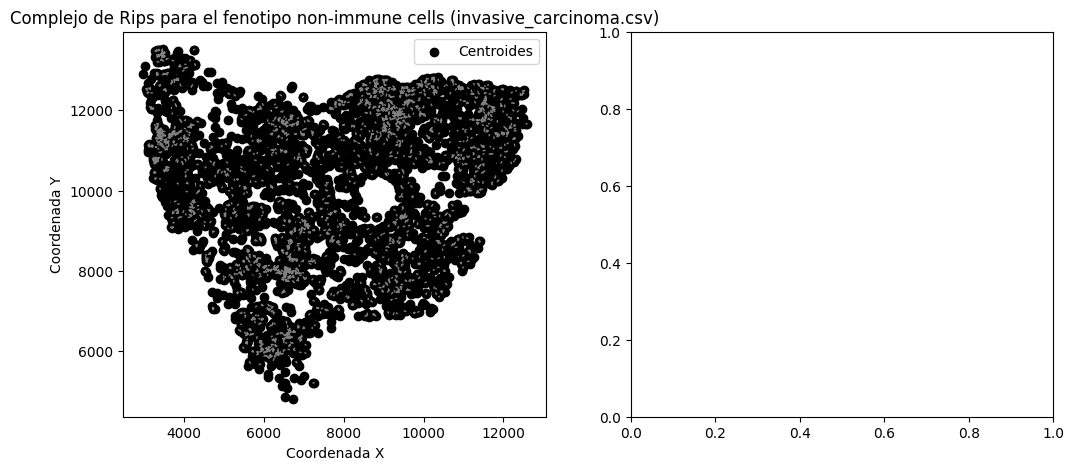

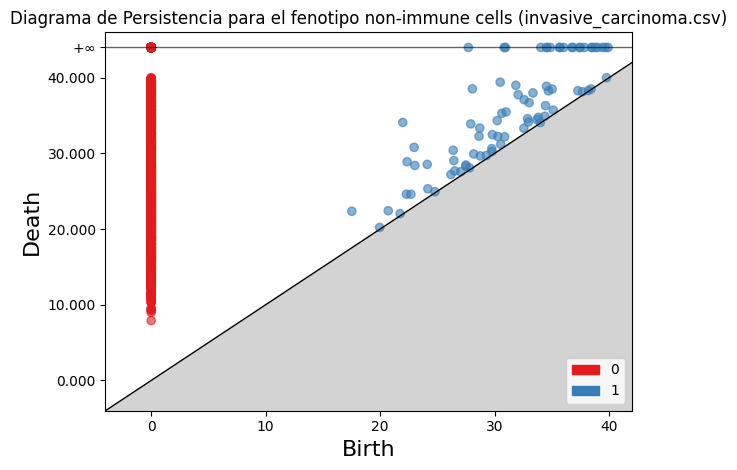

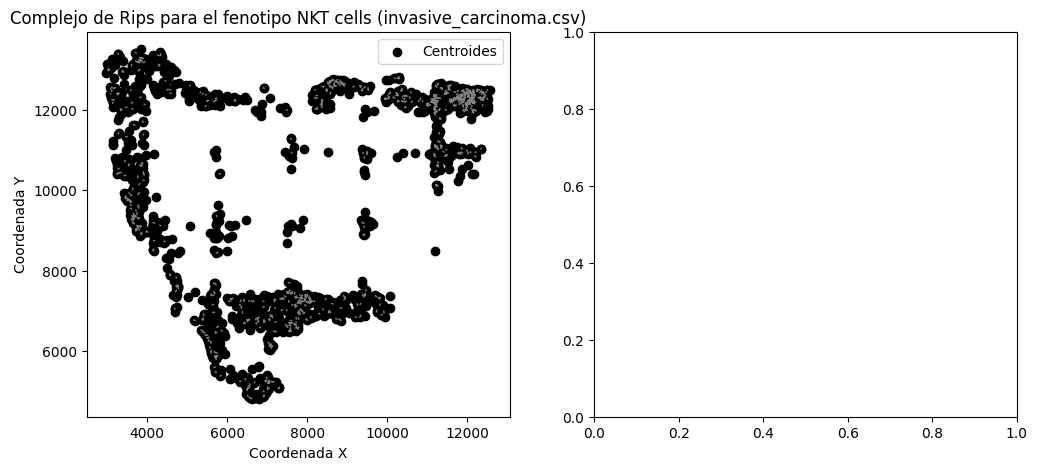

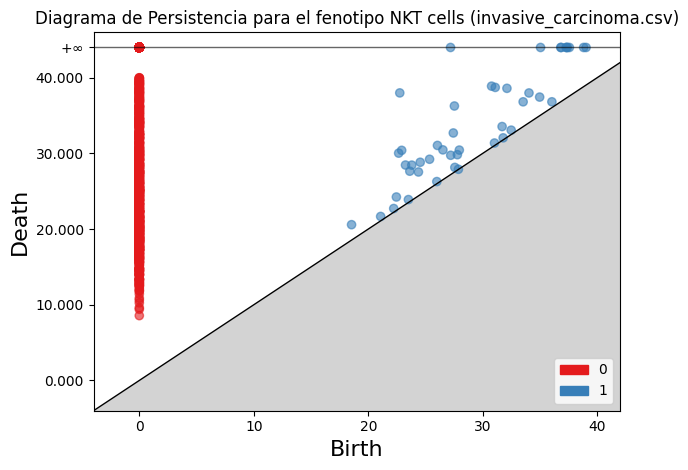

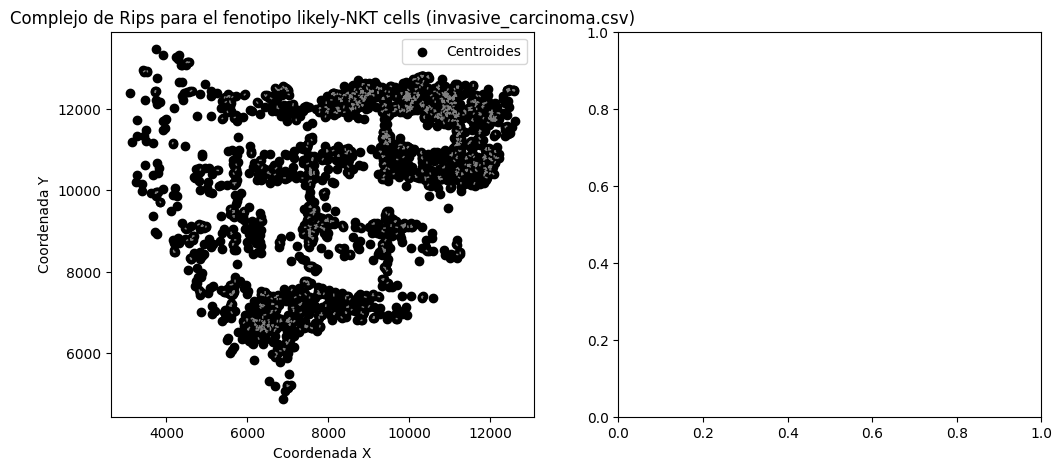

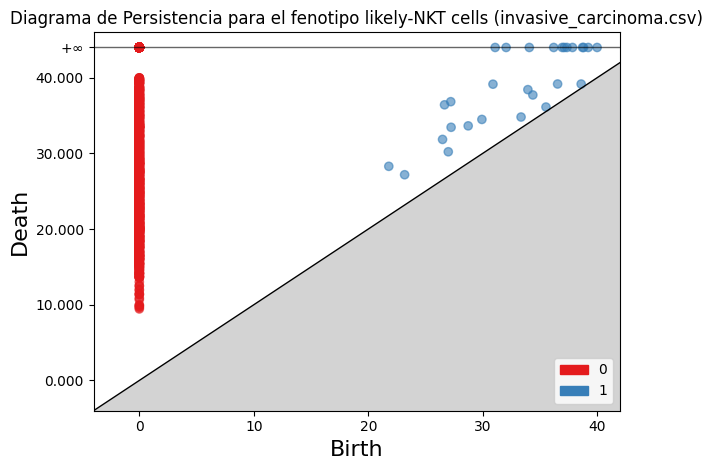

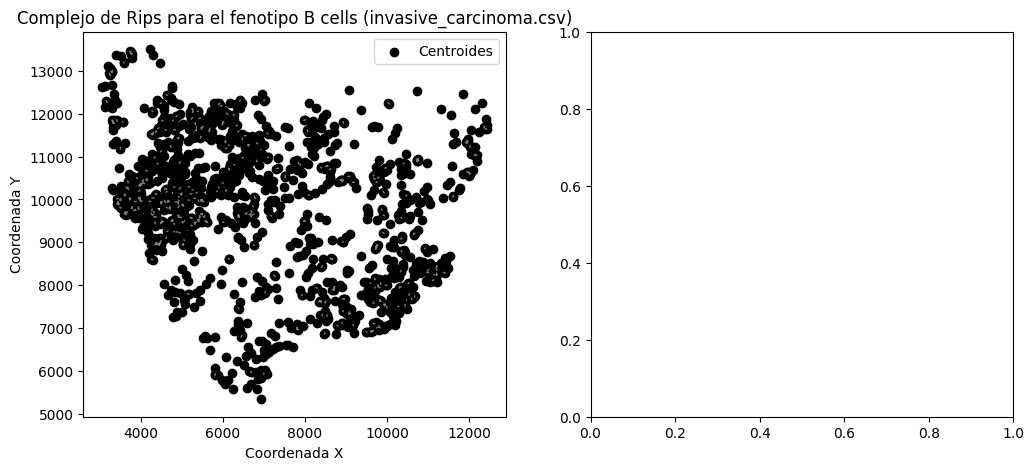

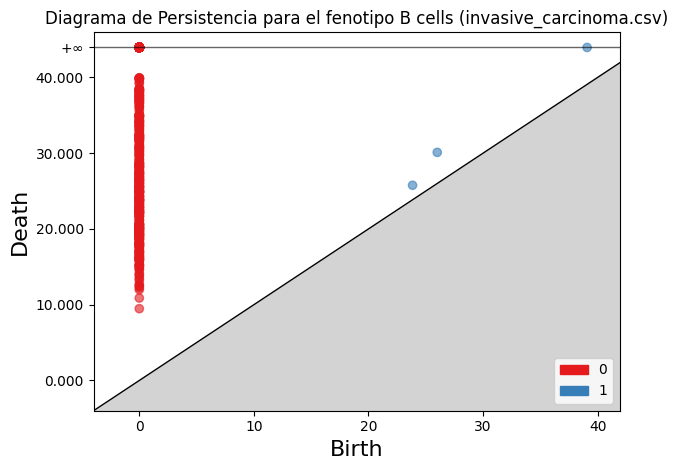

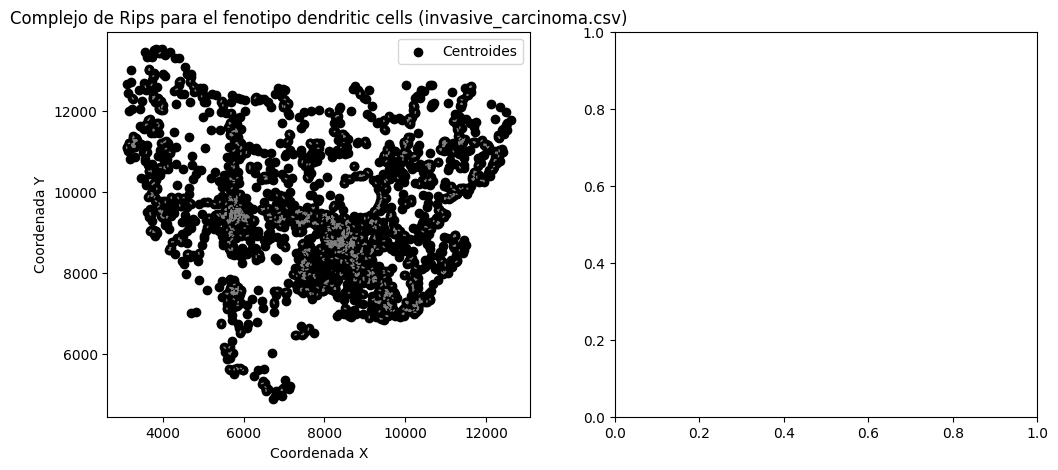

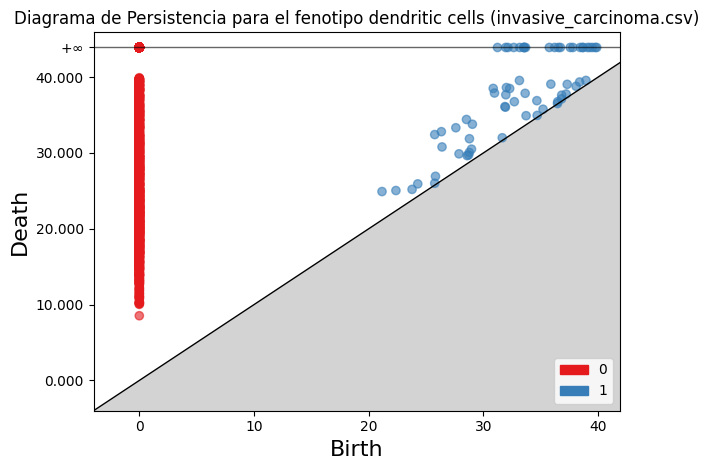

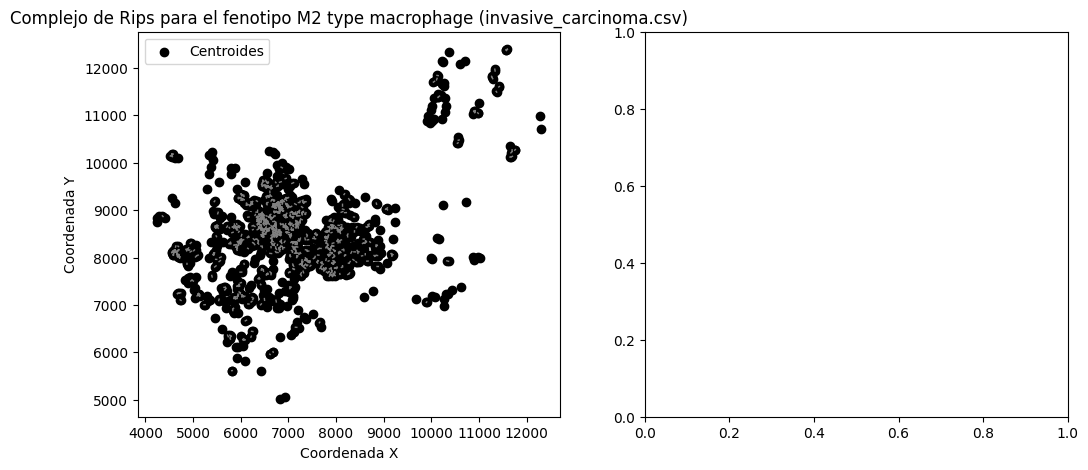

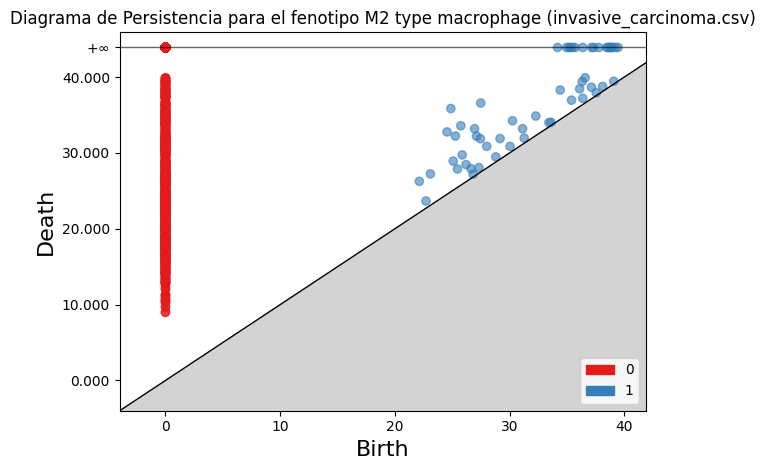

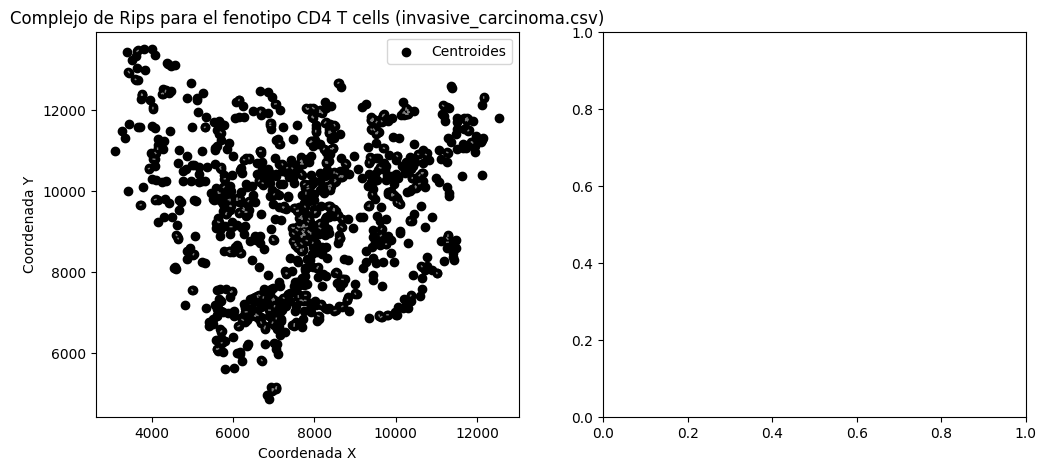

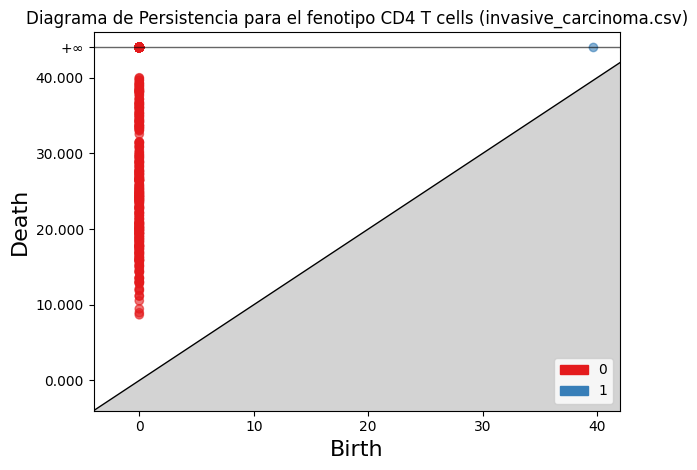

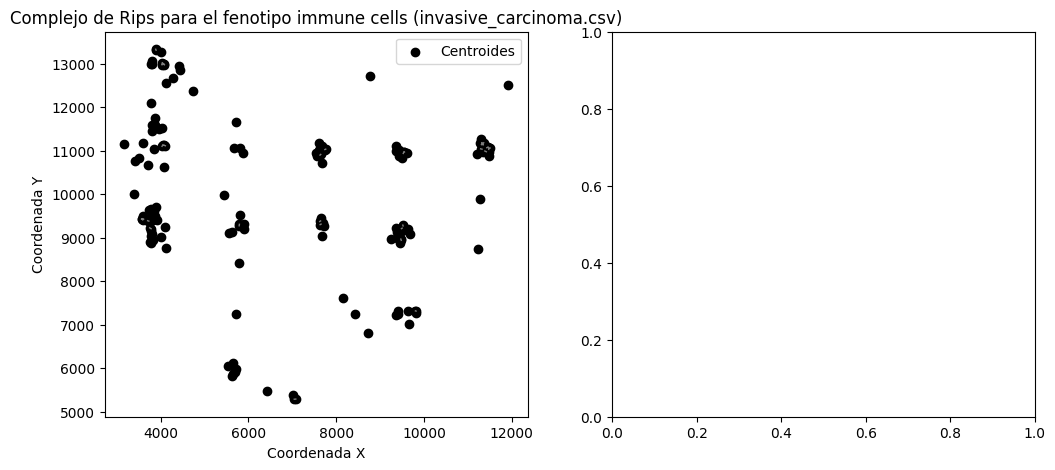

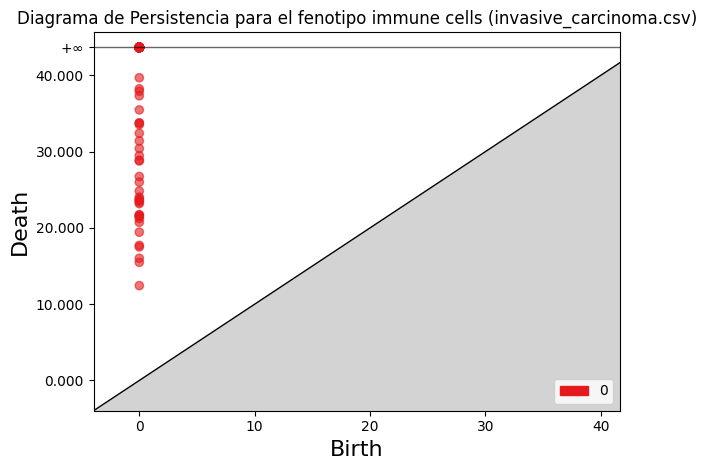

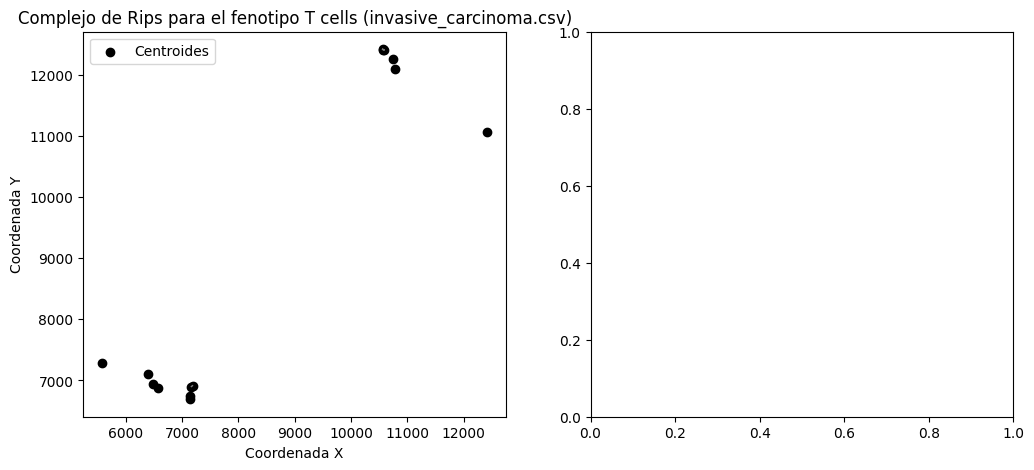

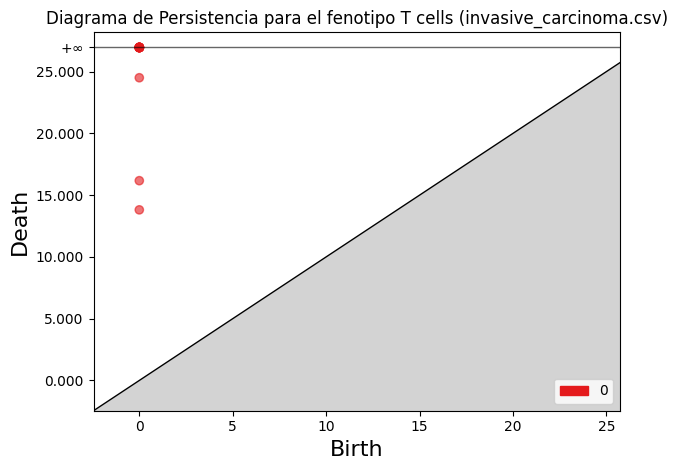

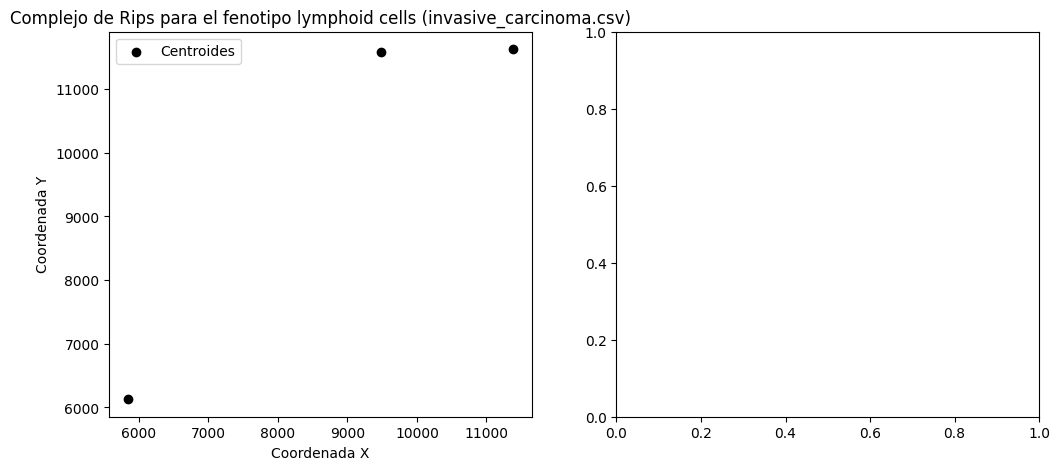

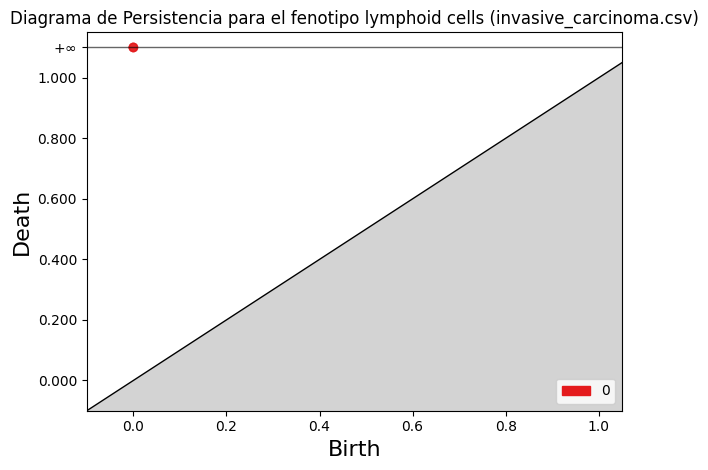

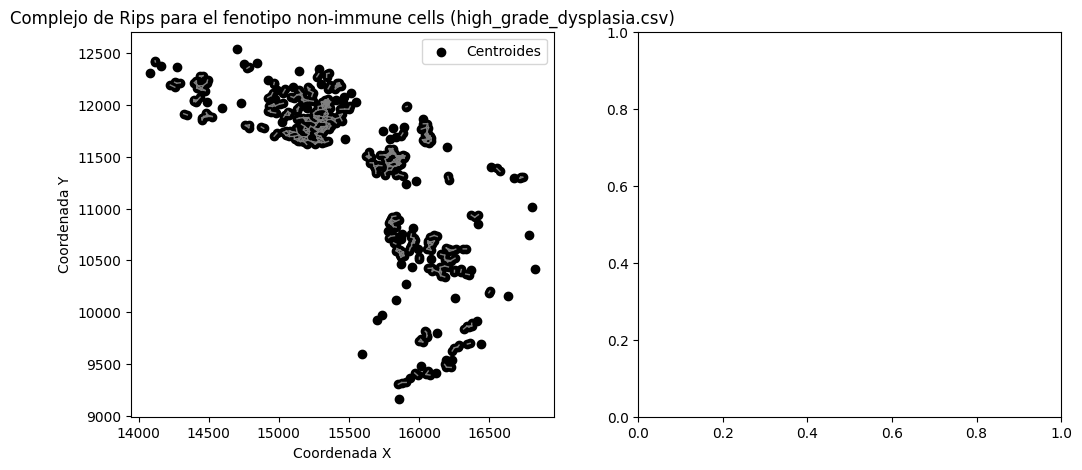

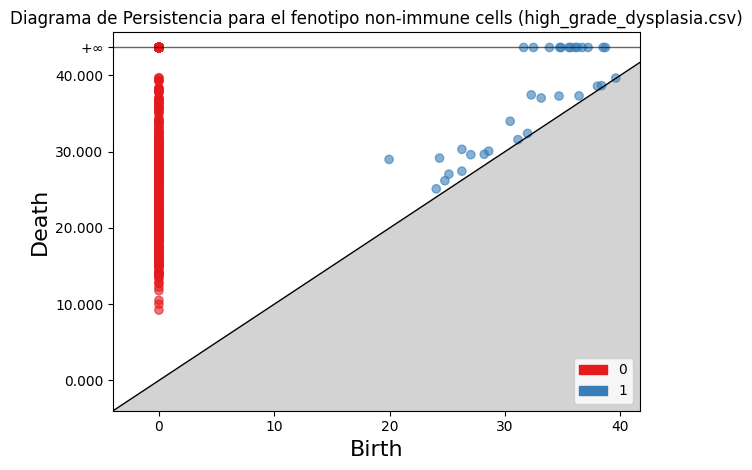

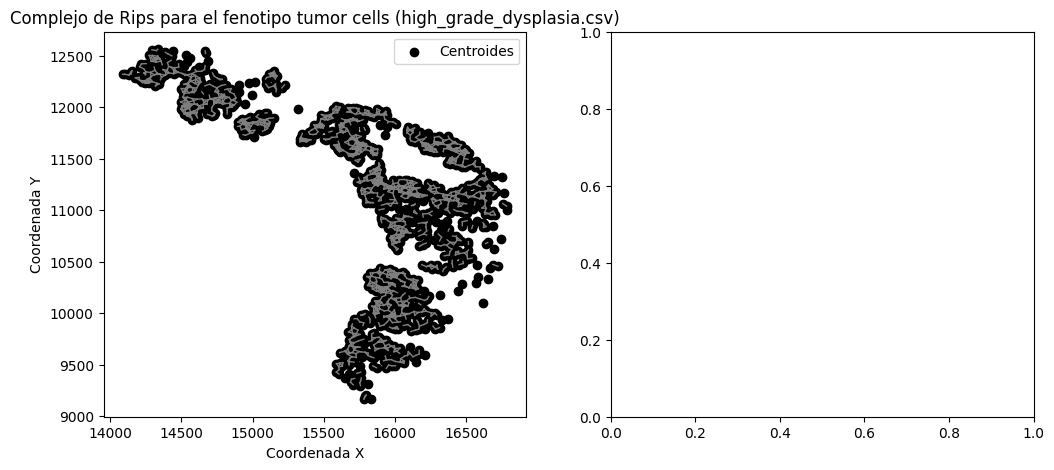

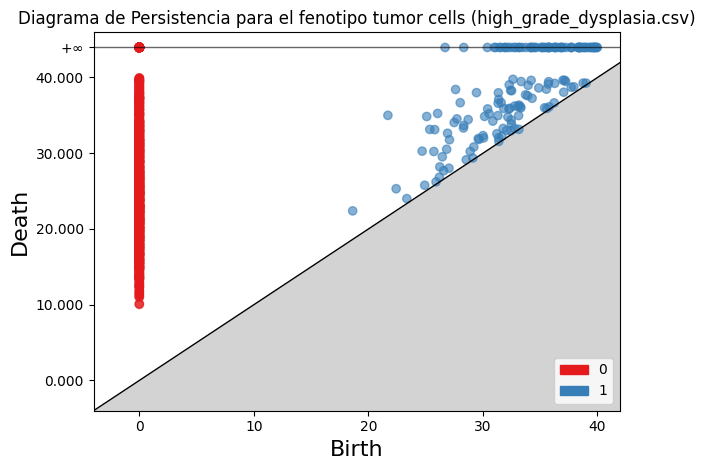

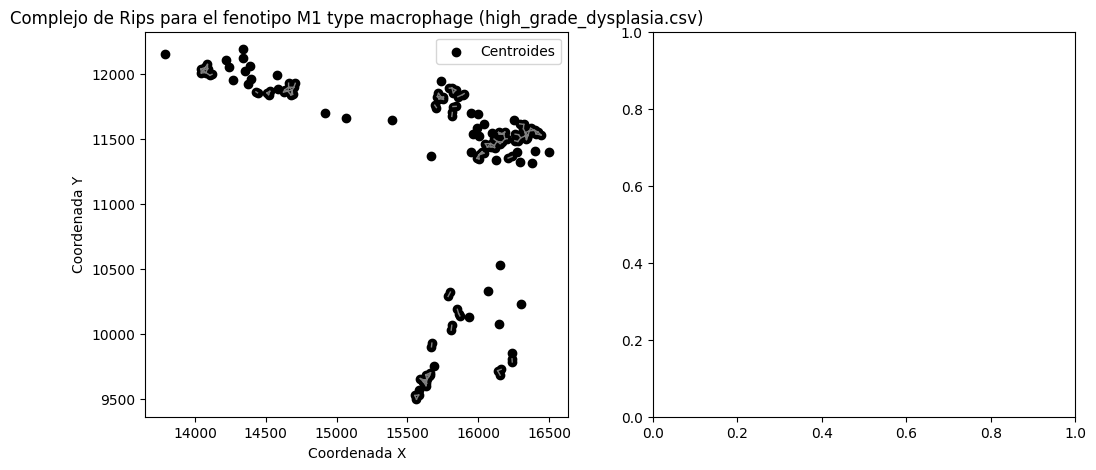

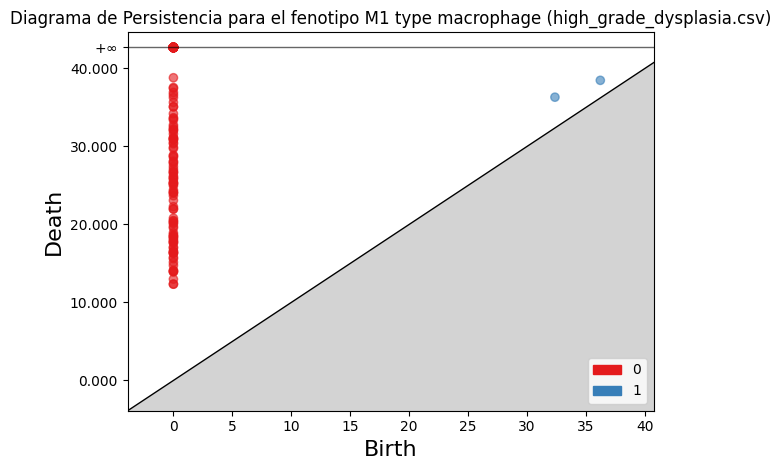

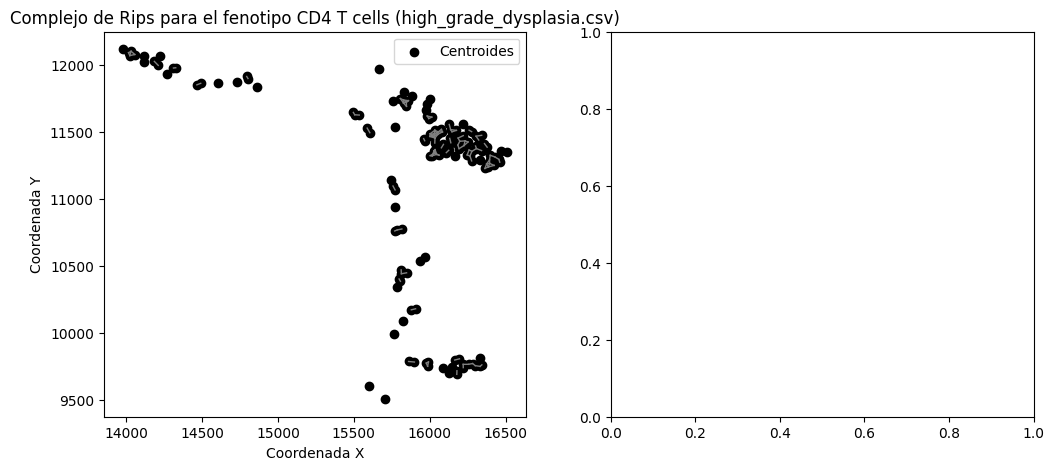

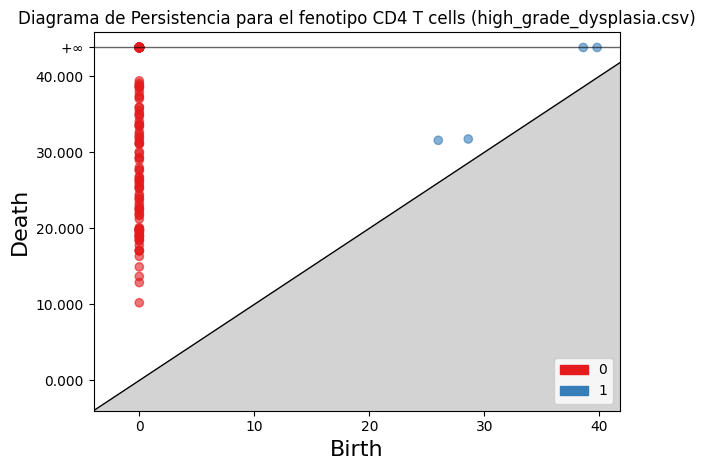

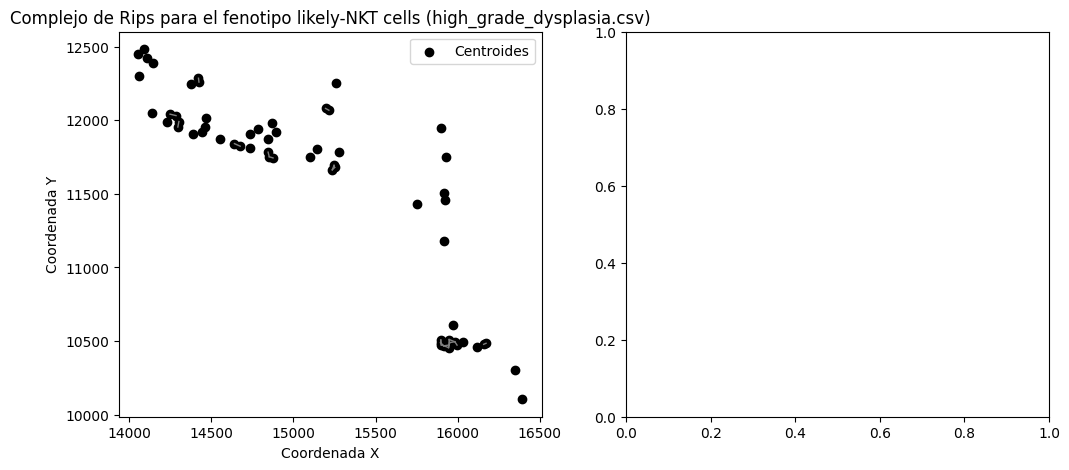

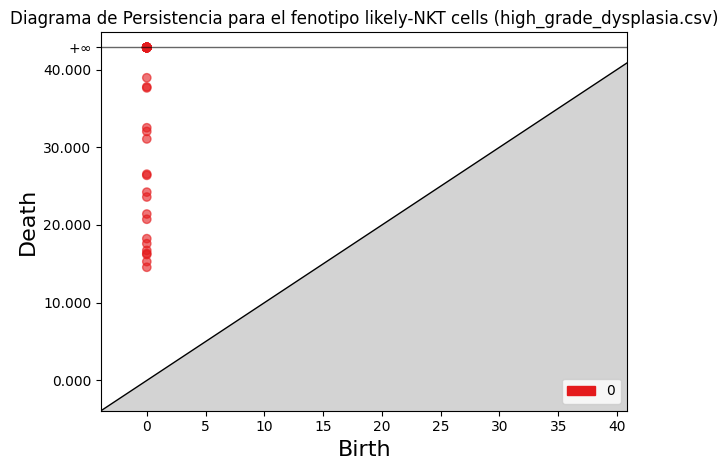

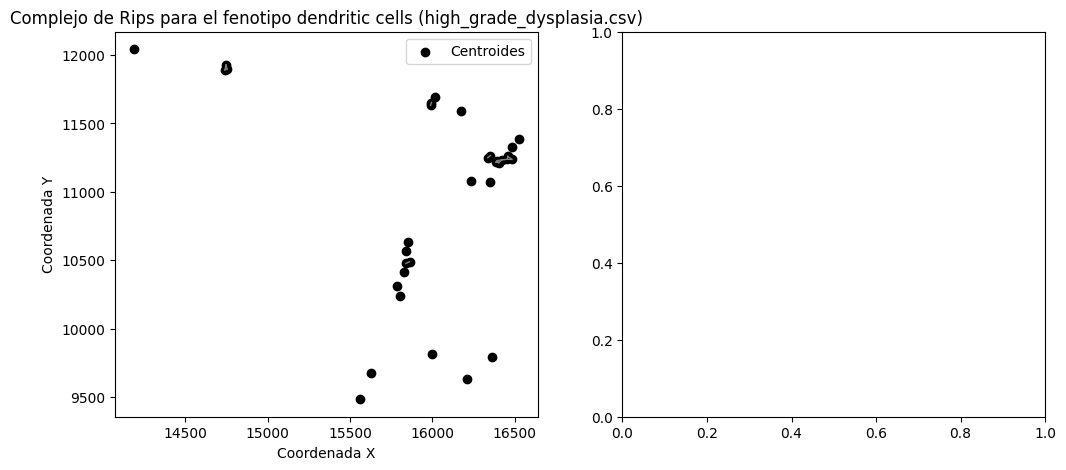

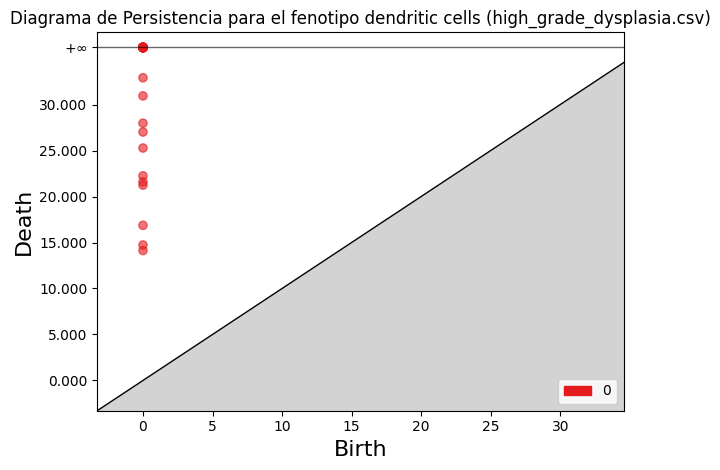

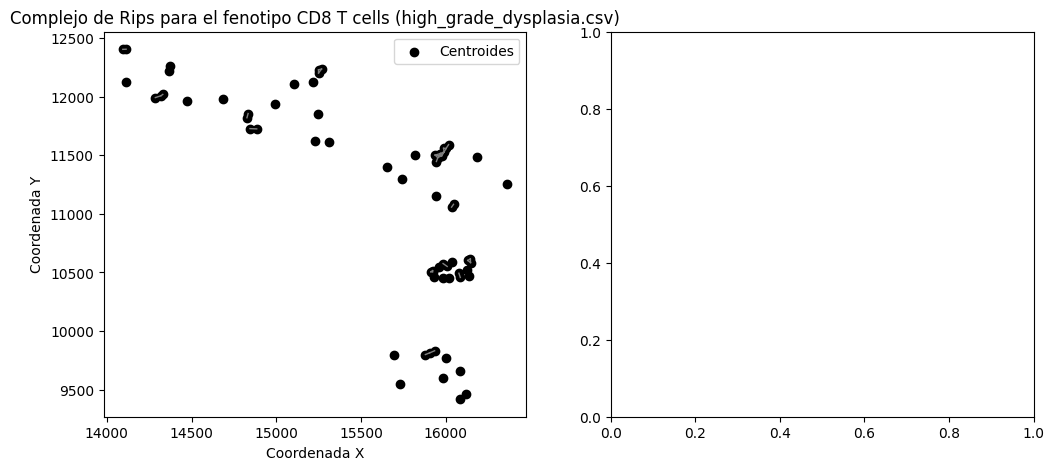

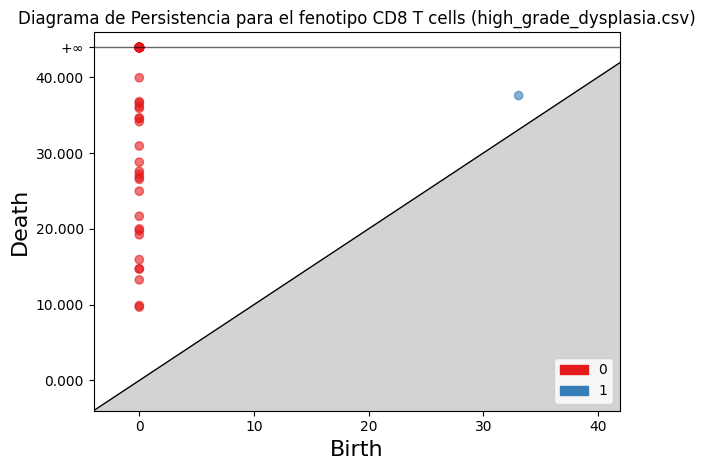

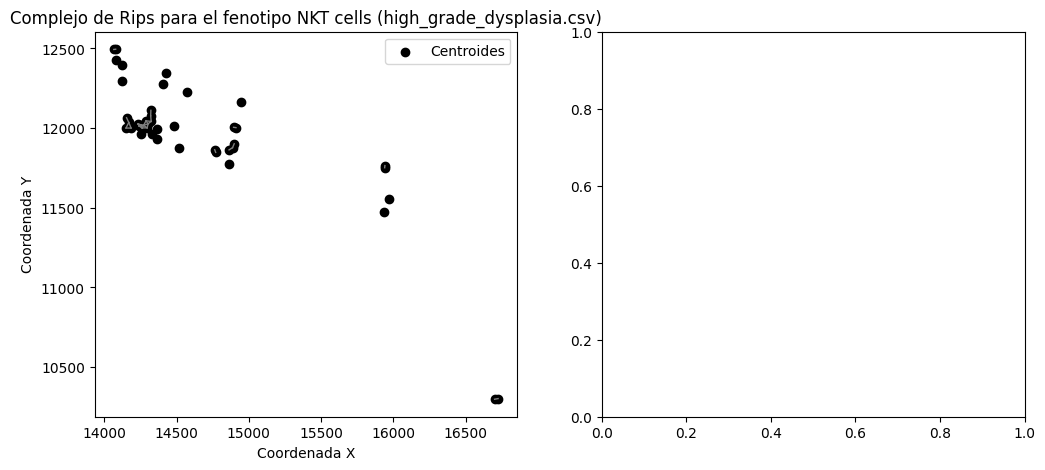

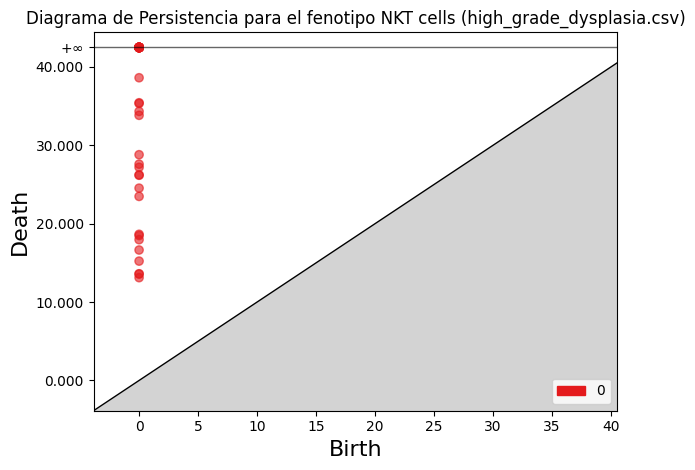

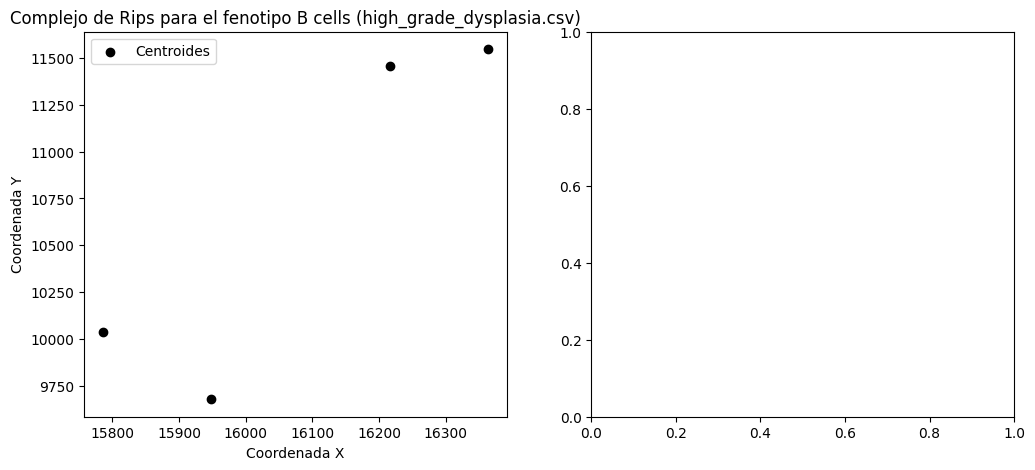

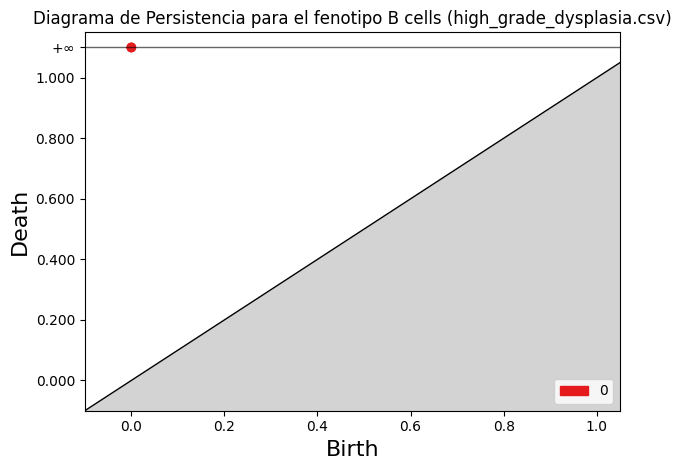

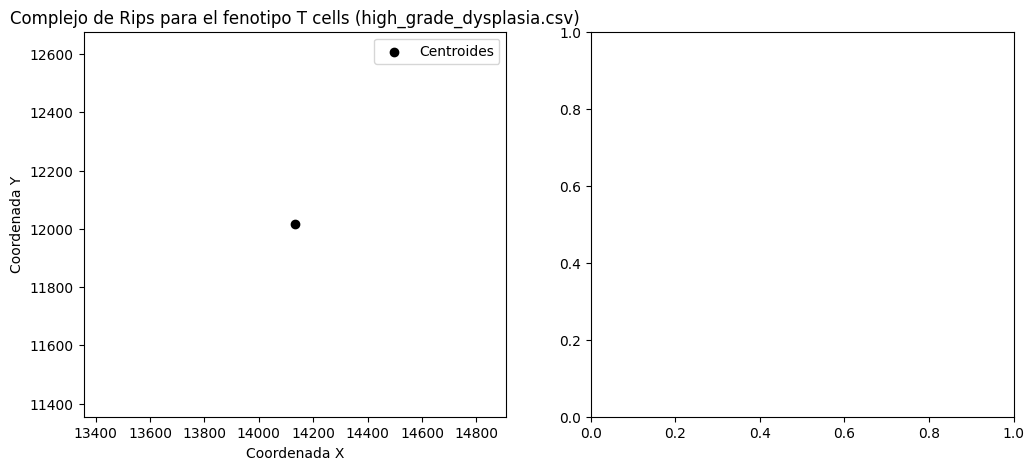

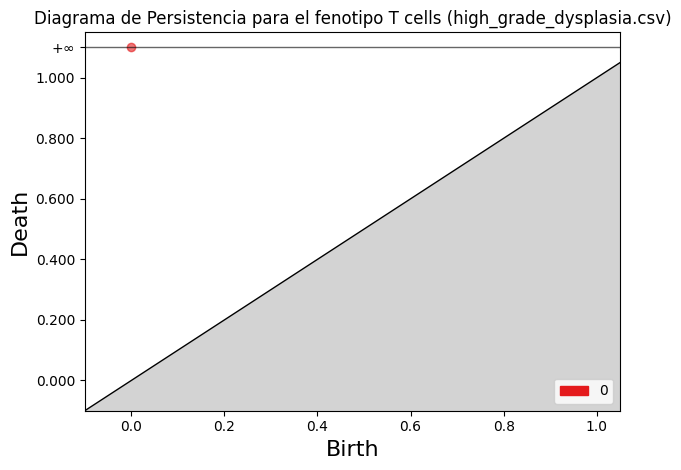

In [12]:
# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-alumno15/Celulas_cancer/carpeta_csv"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Obtener lista de fenotipos únicos
    fenotipos_unicos = df['phenotype'].unique()
    
    # Iterar sobre cada fenotipo
    for fenotipo in fenotipos_unicos:
        # Filtrar células por fenotipo
        df_fenotipo = df[df['phenotype'] == fenotipo]
        X = df_fenotipo['X_centroid'].values
        Y = df_fenotipo['Y_centroid'].values
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(X, Y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [X[i] for i in arista]
                y = [Y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips para el fenotipo {fenotipo} ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia para el fenotipo {fenotipo} ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        plt.show()